In [2]:
import os
import glob
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from torchvision.transforms import transforms
from torch.utils.data import DataLoader, Dataset
from torch.optim import Adam
from torch.autograd import Variable
import torchvision 
import pathlib
from pathlib import Path
import torch.nn.functional as F

In [3]:
path_folder = 'TOP4040/'

In [4]:
class NPZLoader(Dataset):
    def __init__(self, path, transform=None, cur_iter = 7):
        self.path = path
        self.files = list(Path(path).glob('**/*.npz'))
        self.transform = transform
        self.cur_iter = cur_iter

    def __len__(self):
        return len(self.files)

    def __getitem__(self, item):
        numpy_array = np.load(self.files[item])['arr_0']
        target = (numpy_array[-1] > 0.5).astype(np.float32)
        r,c = numpy_array[0].shape
        n_1_iter = numpy_array[self.cur_iter]
        n_iter = numpy_array[self.cur_iter-1]
        gradient = (n_1_iter - n_iter).reshape(1,r,c)
        sample = np.concatenate((n_1_iter.reshape(1,r,c),gradient)), target.reshape(1,40,40)
        
        
        if self.transform:
            sample = self.transform(sample)
        return sample

In [5]:
class ToTensor:
    def __call__(self, sample):
        
        image, target = sample
        
        return torch.from_numpy(image.astype(np.float32)), torch.from_numpy(target.astype(np.float32))
        

In [70]:
check = NPZLoader(path_folder,cur_iter = 20, transform = ToTensor())

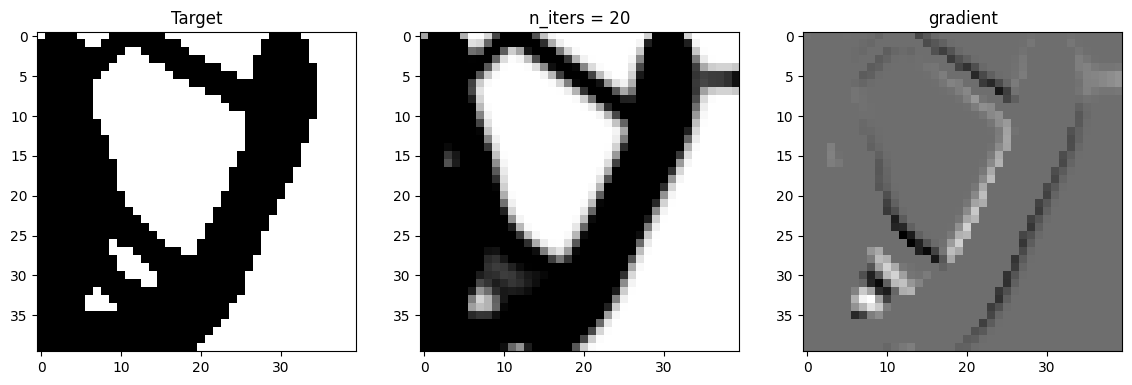

In [71]:
num = 20
plt.figure(figsize = (14,11))
plt.subplot(1,3,1)
plt.title(f'Target')
plt.imshow(check[num][1].view(40,40), cmap= 'binary')

plt.subplot(1,3,2)
plt.title(f'n_iters = {check.cur_iter}')
plt.imshow(check[num][0][0].numpy(), cmap= 'binary')

plt.subplot(1,3,3)
plt.title(f'gradient')
plt.imshow(check[num][0][1].numpy(), cmap= 'binary')

In [ ]:
conv1 = nn.Conv2d(2, 16, 3, padding = 1)
conv11 = nn.Conv2d(16, 16, 3, padding = 1)
conv33 = nn.Conv2d(64, 64, 3, padding = 1)
pool = nn.MaxPool2d(2,2)
conv2 = nn.Conv2d(16, 32, 3,padding = 1)
conv3 = nn.Conv2d(32, 64, 3, padding = 1)
conv4 = nn.Conv2d(64,128, 3, padding=1)
conv5 = nn.ConvTranspose2d(128, 64, 4,stride = 2, padding = 1)
conv6 = nn.ConvTranspose2d(64, 32, 4,stride = 2, padding = 1)
conv7 = nn.ConvTranspose2d(32, 16, 3, padding = 1)
conv8 = nn.ConvTranspose2d(16, 1, 3, padding = 1)
upsample = nn.Upsample(size = 20, mode = 'nearest')
relu = nn.ReLU()
bn1 = nn.BatchNorm2d(16)
print(exam.shape)
drop = nn.Dropout()
x = F.relu(bn1(conv1(exam)))
print(f'conv1 - {x.shape}')
x = conv11(x)
print(f'conv11 - {x.shape}')
x = pool(x)
print(f'pool - {x.shape}')
x = conv2(x)
print(f'conv2 - {x.shape}')
x = pool(x)
print(f'pool - {x.shape}')
x = conv3(x)
print(f'conv3 - {x.shape}')
x = conv33(x)
print(f'conv33 - {x.shape}')
x = pool(x)
print(f'pool - {x.shape}')
x = conv4(x)
print(f'conv4 - {x.shape}')
x = conv5(x)
print(f'conv5 - {x.shape}')
x = conv6(x)
print(f'conv6 - {x.shape}')
x = conv7(x)
print(f'conv7 - {x.shape}')
x = conv8(x)
print(f'conv8 - {x.shape}')
with torch.no_grad():
    plt.imshow(x[2].numpy().reshape(40,40), cmap = 'binary')

In [72]:
train_set = [check[i] for i in range(8000)]
test_set = [check[i] for i in range(8000, len(check))]

In [73]:
train_loader = DataLoader(dataset=train_set, batch_size=100, shuffle = True)
test_set = DataLoader(dataset=test_set, batch_size=100, shuffle = True)

In [10]:
exiter = iter(test_set)
exam, target = next(exiter)

In [11]:
exam.shape

torch.Size([100, 2, 40, 40])

In [12]:
target.shape

torch.Size([100, 1, 40, 40])

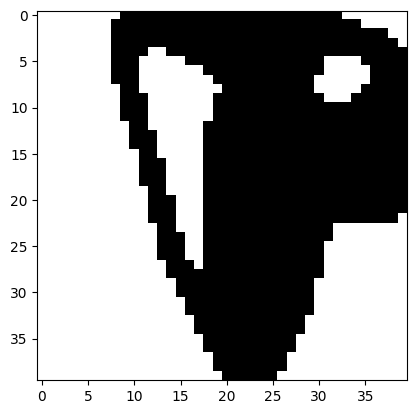

In [13]:
plt.imshow(target[0][0], cmap = 'binary')

In [ ]:
image_check = check[0][0]

In [ ]:
image_check[0].shape

In [ ]:
conv1 = nn.Conv2d(2, 16, 3, padding = 1)
pool = nn.MaxPool2d(2,2)
conv2 = nn.Conv2d(16, 32, 3,padding = 1)
conv3 = nn.Conv2d(32, 64, 3, padding = 1)
conv4 = nn.Conv2d(64,128, 3, padding=1)
conv5 = nn.ConvTranspose2d(128, 64, 4,stride = 2, padding = 1)
conv6 = nn.ConvTranspose2d(64, 32, 4,stride = 2, padding = 1)
conv7 = nn.ConvTranspose2d(32, 16, 3, padding = 1)
conv8 = nn.ConvTranspose2d(16, 1, 3, padding = 1)
upsample = nn.Upsample(size = 20, mode = 'nearest')
print(exam.shape)
drop = nn.Dropout()
x = conv1(exam)
print(f'conv1 - {x.shape}')
x = pool(x)
print(f'pool - {x.shape}')
x = conv2(x)
print(f'conv2 - {x.shape}')
x = drop(x)
print(f'drop - {x.shape}')
x = conv3(x)
print(f'conv4 - {x.shape}')
x = pool(x)
print(f'pool - {x.shape}')
x = conv4(x)
print(f'conv4 - {x.shape}')
x = conv5(x)
print(f'conv5 - {x.shape}')
x = conv6(x)
print(f'conv6 - {x.shape}')
x = conv7(x)
print(f'conv7 - {x.shape}')
x = conv8(x)
print(f'conv8 - {x.shape}')
with torch.no_grad():
    plt.imshow(x[2].numpy().reshape(40,40), cmap = 'binary')

In [ ]:
up_check = image_check[0].view(1,1,40,40)

In [ ]:
plt.imshow(np.reshape(up_check.numpy(), (40,40)), cmap = 'binary')

In [ ]:
up = nn.Upsample(size = (80,80))

In [ ]:
up_check_sam = up(up_check)
up_check_sam.shape

In [ ]:
plt.imshow(np.reshape(up_check_sam.numpy(), (80,80)), cmap = 'binary')

In [ ]:
m = nn.Upsample( size = (8,8),mode='nearest')

In [ ]:
m(a).view(8,8), m(a).shape

In [ ]:
m(b).view(1,8,8)

In [ ]:
model = torch.hub.load('mateuszbuda/brain-segmentation-pytorch', 'unet',
    in_channels=2, out_channels=1, init_features=16, pretrained=False)

In [ ]:
learning_rate = 0.001
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.ADAM(model.parameters(), lr = learning_rate)
# n_epochs = 2

# for epochs in range(n_epochs):
#     for i, (images, labels) in enumerate(train_loader):
        
# #         print(images.shape, labels.shape)
#         outputs = model(images)
#         loss = criterion(outputs, labels)
        
        
#         # backward
        
#         optimizer.zero_grad()
        
#         loss.backward()
        
#         optimizer.step()
        
#         if (i+1) % 100 ==0:
            
#             print(f'epoch {epoch+1} / {num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')

In [18]:
import torch
import torch.nn as nn
import torchvision.transforms.functional as TF

''' inplace=True means that 
                it will modify the input 
                directly, without allocating any
                additional output. It can sometimes slightly decrease the memory usage
'''
class DoubleConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels,kernel_size=3,stride = 1,padding = 1, bias =False), # bias false cause we use batch norm
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels,kernel_size=3,stride = 1,padding = 1, bias =False), # bias false cause we use batch norm
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )

    def forward(self,x):
        return self.conv(x)



class UNET(nn.Module):
    def __init__(
        self, in_channels = 3, out_channels = 1, features = [64,128,256,512] # features - the channels
    ):
        super().__init__()
        self.ups = nn.ModuleList()
        self.downs = nn.ModuleList()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        #Down part of UNET

        for feature in features:
            self.downs.append(DoubleConv(in_channels, feature))
            in_channels = feature

        # up part of UNET

        for feature in reversed(features):
            self.ups.append(
                nn.ConvTranspose2d(feature *2, feature, kernel_size=2, stride = 2)
            )

            self.ups.append(DoubleConv(feature*2, feature))

        self.bottleneck = DoubleConv(features[-1], features[-1]*2)
        self.sig = nn.Sigmoid()
        self.final_conv = nn.Conv2d(features[0], out_channels, kernel_size=1)

           
    def forward(self,x):
        skip_connections = []

        for down in self.downs:
            x = down(x)
            skip_connections.append(x)
            x = self.pool(x)
        
        x = self.bottleneck(x)
        skip_connections = skip_connections[::-1]

        for idx in range(0, len(self.ups), 2):
            x = self.ups[idx](x) # ConvTranspose2d
            skip_connection = skip_connections[idx//2]

            if x.shape != skip_connection.shape:
                x = TF.resize(x, size = skip_connection.shape[2:])

            concat_skip = torch.cat((skip_connection,x), dim = 1) # concatenaate and the double conv
            x = self.ups[idx+1](concat_skip)

        return self.sig(self.final_conv(x))

# def test():
#     x = torch.randn((3,2,160,160))
#     model = UNET(in_channels=2, out_channels=1)
#     preds = model(x)
#     print(f'pred - {preds.shape}')
#     print(x.shape)
#     # assert preds.shape == x.shape

# if __name__ == "__main__":
#     test()

In [40]:
model = UNET(in_channels=2, out_channels = 1, features = [16,32,64])

In [41]:
learning_rate = 1e-4
criterion1 = nn.BCELoss()
criterion2 = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
n_epochs = 100

for epoch in range(n_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
#         print(images.shape, labels.shape)
        outputs = model(images)
        loss1 = criterion1(outputs, labels)
        loss2 = criterion2(outputs, labels)
        loss = loss1 + loss2
        # backward
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        if (i+1) % 1 ==0:
            
            print(f'epoch {epoch+1} / {n_epochs}, step {i+1}/{len(train_loader)}, loss = {loss.item():.4f}')

epoch 1 / 100, step 1/80, loss = 0.8890
epoch 1 / 100, step 2/80, loss = 0.8460
epoch 1 / 100, step 3/80, loss = 0.8347
epoch 1 / 100, step 4/80, loss = 0.8124
epoch 1 / 100, step 5/80, loss = 0.7832
epoch 1 / 100, step 6/80, loss = 0.7425
epoch 1 / 100, step 7/80, loss = 0.7276
epoch 1 / 100, step 8/80, loss = 0.7463
epoch 1 / 100, step 9/80, loss = 0.7274
epoch 1 / 100, step 10/80, loss = 0.6883
epoch 1 / 100, step 11/80, loss = 0.6806
epoch 1 / 100, step 12/80, loss = 0.6995
epoch 1 / 100, step 13/80, loss = 0.6597
epoch 1 / 100, step 14/80, loss = 0.6619
epoch 1 / 100, step 15/80, loss = 0.6517
epoch 1 / 100, step 16/80, loss = 0.6346
epoch 1 / 100, step 17/80, loss = 0.6262
epoch 1 / 100, step 18/80, loss = 0.6226
epoch 1 / 100, step 19/80, loss = 0.6235
epoch 1 / 100, step 20/80, loss = 0.5962
epoch 1 / 100, step 21/80, loss = 0.6003
epoch 1 / 100, step 22/80, loss = 0.6032
epoch 1 / 100, step 23/80, loss = 0.5823
epoch 1 / 100, step 24/80, loss = 0.5830
epoch 1 / 100, step 25/80

epoch 3 / 100, step 42/80, loss = 0.3811
epoch 3 / 100, step 43/80, loss = 0.3923
epoch 3 / 100, step 44/80, loss = 0.3867
epoch 3 / 100, step 45/80, loss = 0.3965
epoch 3 / 100, step 46/80, loss = 0.3912
epoch 3 / 100, step 47/80, loss = 0.3955
epoch 3 / 100, step 48/80, loss = 0.3728
epoch 3 / 100, step 49/80, loss = 0.3952
epoch 3 / 100, step 50/80, loss = 0.3824
epoch 3 / 100, step 51/80, loss = 0.3900
epoch 3 / 100, step 52/80, loss = 0.3816
epoch 3 / 100, step 53/80, loss = 0.3849
epoch 3 / 100, step 54/80, loss = 0.3865
epoch 3 / 100, step 55/80, loss = 0.3884
epoch 3 / 100, step 56/80, loss = 0.3692
epoch 3 / 100, step 57/80, loss = 0.3902
epoch 3 / 100, step 58/80, loss = 0.3797
epoch 3 / 100, step 59/80, loss = 0.3774
epoch 3 / 100, step 60/80, loss = 0.3735
epoch 3 / 100, step 61/80, loss = 0.3799
epoch 3 / 100, step 62/80, loss = 0.3850
epoch 3 / 100, step 63/80, loss = 0.3788
epoch 3 / 100, step 64/80, loss = 0.3833
epoch 3 / 100, step 65/80, loss = 0.3753
epoch 3 / 100, s

epoch 6 / 100, step 3/80, loss = 0.3216
epoch 6 / 100, step 4/80, loss = 0.3216
epoch 6 / 100, step 5/80, loss = 0.3243
epoch 6 / 100, step 6/80, loss = 0.3235
epoch 6 / 100, step 7/80, loss = 0.3336
epoch 6 / 100, step 8/80, loss = 0.3253
epoch 6 / 100, step 9/80, loss = 0.3209
epoch 6 / 100, step 10/80, loss = 0.3138
epoch 6 / 100, step 11/80, loss = 0.3212
epoch 6 / 100, step 12/80, loss = 0.3189
epoch 6 / 100, step 13/80, loss = 0.3232
epoch 6 / 100, step 14/80, loss = 0.3147
epoch 6 / 100, step 15/80, loss = 0.3313
epoch 6 / 100, step 16/80, loss = 0.3301
epoch 6 / 100, step 17/80, loss = 0.3280
epoch 6 / 100, step 18/80, loss = 0.3243
epoch 6 / 100, step 19/80, loss = 0.3235
epoch 6 / 100, step 20/80, loss = 0.3187
epoch 6 / 100, step 21/80, loss = 0.3245
epoch 6 / 100, step 22/80, loss = 0.3171
epoch 6 / 100, step 23/80, loss = 0.3183
epoch 6 / 100, step 24/80, loss = 0.3218
epoch 6 / 100, step 25/80, loss = 0.3243
epoch 6 / 100, step 26/80, loss = 0.3284
epoch 6 / 100, step 27/

epoch 8 / 100, step 44/80, loss = 0.2812
epoch 8 / 100, step 45/80, loss = 0.2757
epoch 8 / 100, step 46/80, loss = 0.2880
epoch 8 / 100, step 47/80, loss = 0.2775
epoch 8 / 100, step 48/80, loss = 0.2741
epoch 8 / 100, step 49/80, loss = 0.2787
epoch 8 / 100, step 50/80, loss = 0.2675
epoch 8 / 100, step 51/80, loss = 0.2796
epoch 8 / 100, step 52/80, loss = 0.2807
epoch 8 / 100, step 53/80, loss = 0.2664
epoch 8 / 100, step 54/80, loss = 0.2828
epoch 8 / 100, step 55/80, loss = 0.2735
epoch 8 / 100, step 56/80, loss = 0.2640
epoch 8 / 100, step 57/80, loss = 0.2751
epoch 8 / 100, step 58/80, loss = 0.2848
epoch 8 / 100, step 59/80, loss = 0.2801
epoch 8 / 100, step 60/80, loss = 0.2719
epoch 8 / 100, step 61/80, loss = 0.2734
epoch 8 / 100, step 62/80, loss = 0.2667
epoch 8 / 100, step 63/80, loss = 0.2623
epoch 8 / 100, step 64/80, loss = 0.2834
epoch 8 / 100, step 65/80, loss = 0.2843
epoch 8 / 100, step 66/80, loss = 0.2836
epoch 8 / 100, step 67/80, loss = 0.2723
epoch 8 / 100, s

epoch 11 / 100, step 3/80, loss = 0.2508
epoch 11 / 100, step 4/80, loss = 0.2360
epoch 11 / 100, step 5/80, loss = 0.2421
epoch 11 / 100, step 6/80, loss = 0.2362
epoch 11 / 100, step 7/80, loss = 0.2387
epoch 11 / 100, step 8/80, loss = 0.2277
epoch 11 / 100, step 9/80, loss = 0.2288
epoch 11 / 100, step 10/80, loss = 0.2256
epoch 11 / 100, step 11/80, loss = 0.2306
epoch 11 / 100, step 12/80, loss = 0.2349
epoch 11 / 100, step 13/80, loss = 0.2291
epoch 11 / 100, step 14/80, loss = 0.2399
epoch 11 / 100, step 15/80, loss = 0.2419
epoch 11 / 100, step 16/80, loss = 0.2449
epoch 11 / 100, step 17/80, loss = 0.2384
epoch 11 / 100, step 18/80, loss = 0.2303
epoch 11 / 100, step 19/80, loss = 0.2402
epoch 11 / 100, step 20/80, loss = 0.2290
epoch 11 / 100, step 21/80, loss = 0.2406
epoch 11 / 100, step 22/80, loss = 0.2358
epoch 11 / 100, step 23/80, loss = 0.2286
epoch 11 / 100, step 24/80, loss = 0.2309
epoch 11 / 100, step 25/80, loss = 0.2296
epoch 11 / 100, step 26/80, loss = 0.2283

epoch 13 / 100, step 39/80, loss = 0.2035
epoch 13 / 100, step 40/80, loss = 0.2082
epoch 13 / 100, step 41/80, loss = 0.1996
epoch 13 / 100, step 42/80, loss = 0.2087
epoch 13 / 100, step 43/80, loss = 0.2113
epoch 13 / 100, step 44/80, loss = 0.2028
epoch 13 / 100, step 45/80, loss = 0.2143
epoch 13 / 100, step 46/80, loss = 0.2087
epoch 13 / 100, step 47/80, loss = 0.2003
epoch 13 / 100, step 48/80, loss = 0.2038
epoch 13 / 100, step 49/80, loss = 0.1993
epoch 13 / 100, step 50/80, loss = 0.2047
epoch 13 / 100, step 51/80, loss = 0.2013
epoch 13 / 100, step 52/80, loss = 0.2069
epoch 13 / 100, step 53/80, loss = 0.2029
epoch 13 / 100, step 54/80, loss = 0.2035
epoch 13 / 100, step 55/80, loss = 0.2083
epoch 13 / 100, step 56/80, loss = 0.2043
epoch 13 / 100, step 57/80, loss = 0.1975
epoch 13 / 100, step 58/80, loss = 0.2021
epoch 13 / 100, step 59/80, loss = 0.2008
epoch 13 / 100, step 60/80, loss = 0.2017
epoch 13 / 100, step 61/80, loss = 0.2050
epoch 13 / 100, step 62/80, loss =

epoch 15 / 100, step 75/80, loss = 0.1870
epoch 15 / 100, step 76/80, loss = 0.1812
epoch 15 / 100, step 77/80, loss = 0.1822
epoch 15 / 100, step 78/80, loss = 0.1724
epoch 15 / 100, step 79/80, loss = 0.1705
epoch 15 / 100, step 80/80, loss = 0.1739
epoch 16 / 100, step 1/80, loss = 0.1753
epoch 16 / 100, step 2/80, loss = 0.1672
epoch 16 / 100, step 3/80, loss = 0.1853
epoch 16 / 100, step 4/80, loss = 0.1759
epoch 16 / 100, step 5/80, loss = 0.1703
epoch 16 / 100, step 6/80, loss = 0.1759
epoch 16 / 100, step 7/80, loss = 0.1750
epoch 16 / 100, step 8/80, loss = 0.1731
epoch 16 / 100, step 9/80, loss = 0.1800
epoch 16 / 100, step 10/80, loss = 0.1735
epoch 16 / 100, step 11/80, loss = 0.1784
epoch 16 / 100, step 12/80, loss = 0.1731
epoch 16 / 100, step 13/80, loss = 0.1781
epoch 16 / 100, step 14/80, loss = 0.1823
epoch 16 / 100, step 15/80, loss = 0.1700
epoch 16 / 100, step 16/80, loss = 0.1757
epoch 16 / 100, step 17/80, loss = 0.1985
epoch 16 / 100, step 18/80, loss = 0.1789
e

epoch 18 / 100, step 31/80, loss = 0.1553
epoch 18 / 100, step 32/80, loss = 0.1619
epoch 18 / 100, step 33/80, loss = 0.1589
epoch 18 / 100, step 34/80, loss = 0.1489
epoch 18 / 100, step 35/80, loss = 0.1561
epoch 18 / 100, step 36/80, loss = 0.1629
epoch 18 / 100, step 37/80, loss = 0.1590
epoch 18 / 100, step 38/80, loss = 0.1570
epoch 18 / 100, step 39/80, loss = 0.1593
epoch 18 / 100, step 40/80, loss = 0.1560
epoch 18 / 100, step 41/80, loss = 0.1562
epoch 18 / 100, step 42/80, loss = 0.1511
epoch 18 / 100, step 43/80, loss = 0.1567
epoch 18 / 100, step 44/80, loss = 0.1538
epoch 18 / 100, step 45/80, loss = 0.1583
epoch 18 / 100, step 46/80, loss = 0.1622
epoch 18 / 100, step 47/80, loss = 0.1531
epoch 18 / 100, step 48/80, loss = 0.1583
epoch 18 / 100, step 49/80, loss = 0.1564
epoch 18 / 100, step 50/80, loss = 0.1518
epoch 18 / 100, step 51/80, loss = 0.1609
epoch 18 / 100, step 52/80, loss = 0.1663
epoch 18 / 100, step 53/80, loss = 0.1608
epoch 18 / 100, step 54/80, loss =

epoch 20 / 100, step 67/80, loss = 0.1488
epoch 20 / 100, step 68/80, loss = 0.1371
epoch 20 / 100, step 69/80, loss = 0.1416
epoch 20 / 100, step 70/80, loss = 0.1351
epoch 20 / 100, step 71/80, loss = 0.1488
epoch 20 / 100, step 72/80, loss = 0.1403
epoch 20 / 100, step 73/80, loss = 0.1489
epoch 20 / 100, step 74/80, loss = 0.1389
epoch 20 / 100, step 75/80, loss = 0.1447
epoch 20 / 100, step 76/80, loss = 0.1383
epoch 20 / 100, step 77/80, loss = 0.1329
epoch 20 / 100, step 78/80, loss = 0.1398
epoch 20 / 100, step 79/80, loss = 0.1372
epoch 20 / 100, step 80/80, loss = 0.1355
epoch 21 / 100, step 1/80, loss = 0.1369
epoch 21 / 100, step 2/80, loss = 0.1335
epoch 21 / 100, step 3/80, loss = 0.1371
epoch 21 / 100, step 4/80, loss = 0.1330
epoch 21 / 100, step 5/80, loss = 0.1375
epoch 21 / 100, step 6/80, loss = 0.1411
epoch 21 / 100, step 7/80, loss = 0.1326
epoch 21 / 100, step 8/80, loss = 0.1402
epoch 21 / 100, step 9/80, loss = 0.1363
epoch 21 / 100, step 10/80, loss = 0.1411
e

epoch 23 / 100, step 23/80, loss = 0.1250
epoch 23 / 100, step 24/80, loss = 0.1188
epoch 23 / 100, step 25/80, loss = 0.1282
epoch 23 / 100, step 26/80, loss = 0.1242
epoch 23 / 100, step 27/80, loss = 0.1254
epoch 23 / 100, step 28/80, loss = 0.1249
epoch 23 / 100, step 29/80, loss = 0.1313
epoch 23 / 100, step 30/80, loss = 0.1212
epoch 23 / 100, step 31/80, loss = 0.1279
epoch 23 / 100, step 32/80, loss = 0.1249
epoch 23 / 100, step 33/80, loss = 0.1201
epoch 23 / 100, step 34/80, loss = 0.1175
epoch 23 / 100, step 35/80, loss = 0.1178
epoch 23 / 100, step 36/80, loss = 0.1219
epoch 23 / 100, step 37/80, loss = 0.1289
epoch 23 / 100, step 38/80, loss = 0.1367
epoch 23 / 100, step 39/80, loss = 0.1216
epoch 23 / 100, step 40/80, loss = 0.1222
epoch 23 / 100, step 41/80, loss = 0.1202
epoch 23 / 100, step 42/80, loss = 0.1240
epoch 23 / 100, step 43/80, loss = 0.1237
epoch 23 / 100, step 44/80, loss = 0.1205
epoch 23 / 100, step 45/80, loss = 0.1303
epoch 23 / 100, step 46/80, loss =

epoch 25 / 100, step 59/80, loss = 0.1139
epoch 25 / 100, step 60/80, loss = 0.1156
epoch 25 / 100, step 61/80, loss = 0.1175
epoch 25 / 100, step 62/80, loss = 0.1046
epoch 25 / 100, step 63/80, loss = 0.1165
epoch 25 / 100, step 64/80, loss = 0.1098
epoch 25 / 100, step 65/80, loss = 0.1154
epoch 25 / 100, step 66/80, loss = 0.1055
epoch 25 / 100, step 67/80, loss = 0.1099
epoch 25 / 100, step 68/80, loss = 0.1100
epoch 25 / 100, step 69/80, loss = 0.1078
epoch 25 / 100, step 70/80, loss = 0.1204
epoch 25 / 100, step 71/80, loss = 0.1107
epoch 25 / 100, step 72/80, loss = 0.1093
epoch 25 / 100, step 73/80, loss = 0.1113
epoch 25 / 100, step 74/80, loss = 0.1120
epoch 25 / 100, step 75/80, loss = 0.1166
epoch 25 / 100, step 76/80, loss = 0.1097
epoch 25 / 100, step 77/80, loss = 0.1090
epoch 25 / 100, step 78/80, loss = 0.1148
epoch 25 / 100, step 79/80, loss = 0.1045
epoch 25 / 100, step 80/80, loss = 0.1067
epoch 26 / 100, step 1/80, loss = 0.1040
epoch 26 / 100, step 2/80, loss = 0

epoch 28 / 100, step 15/80, loss = 0.1042
epoch 28 / 100, step 16/80, loss = 0.1031
epoch 28 / 100, step 17/80, loss = 0.0983
epoch 28 / 100, step 18/80, loss = 0.0959
epoch 28 / 100, step 19/80, loss = 0.0985
epoch 28 / 100, step 20/80, loss = 0.1022
epoch 28 / 100, step 21/80, loss = 0.1033
epoch 28 / 100, step 22/80, loss = 0.0970
epoch 28 / 100, step 23/80, loss = 0.0966
epoch 28 / 100, step 24/80, loss = 0.1021
epoch 28 / 100, step 25/80, loss = 0.0967
epoch 28 / 100, step 26/80, loss = 0.0943
epoch 28 / 100, step 27/80, loss = 0.1027
epoch 28 / 100, step 28/80, loss = 0.0986
epoch 28 / 100, step 29/80, loss = 0.1047
epoch 28 / 100, step 30/80, loss = 0.0996
epoch 28 / 100, step 31/80, loss = 0.1007
epoch 28 / 100, step 32/80, loss = 0.1014
epoch 28 / 100, step 33/80, loss = 0.0958
epoch 28 / 100, step 34/80, loss = 0.1010
epoch 28 / 100, step 35/80, loss = 0.1001
epoch 28 / 100, step 36/80, loss = 0.1034
epoch 28 / 100, step 37/80, loss = 0.0942
epoch 28 / 100, step 38/80, loss =

epoch 30 / 100, step 51/80, loss = 0.0936
epoch 30 / 100, step 52/80, loss = 0.0931
epoch 30 / 100, step 53/80, loss = 0.0937
epoch 30 / 100, step 54/80, loss = 0.0920
epoch 30 / 100, step 55/80, loss = 0.0971
epoch 30 / 100, step 56/80, loss = 0.0991
epoch 30 / 100, step 57/80, loss = 0.0940
epoch 30 / 100, step 58/80, loss = 0.0900
epoch 30 / 100, step 59/80, loss = 0.1009
epoch 30 / 100, step 60/80, loss = 0.0866
epoch 30 / 100, step 61/80, loss = 0.0894
epoch 30 / 100, step 62/80, loss = 0.0917
epoch 30 / 100, step 63/80, loss = 0.0949
epoch 30 / 100, step 64/80, loss = 0.0965
epoch 30 / 100, step 65/80, loss = 0.0923
epoch 30 / 100, step 66/80, loss = 0.0888
epoch 30 / 100, step 67/80, loss = 0.0967
epoch 30 / 100, step 68/80, loss = 0.0944
epoch 30 / 100, step 69/80, loss = 0.0916
epoch 30 / 100, step 70/80, loss = 0.0870
epoch 30 / 100, step 71/80, loss = 0.1012
epoch 30 / 100, step 72/80, loss = 0.0988
epoch 30 / 100, step 73/80, loss = 0.0883
epoch 30 / 100, step 74/80, loss =

epoch 33 / 100, step 7/80, loss = 0.0838
epoch 33 / 100, step 8/80, loss = 0.0793
epoch 33 / 100, step 9/80, loss = 0.0915
epoch 33 / 100, step 10/80, loss = 0.0824
epoch 33 / 100, step 11/80, loss = 0.0845
epoch 33 / 100, step 12/80, loss = 0.0854
epoch 33 / 100, step 13/80, loss = 0.0838
epoch 33 / 100, step 14/80, loss = 0.0860
epoch 33 / 100, step 15/80, loss = 0.0839
epoch 33 / 100, step 16/80, loss = 0.0826
epoch 33 / 100, step 17/80, loss = 0.0850
epoch 33 / 100, step 18/80, loss = 0.0772
epoch 33 / 100, step 19/80, loss = 0.0866
epoch 33 / 100, step 20/80, loss = 0.0852
epoch 33 / 100, step 21/80, loss = 0.0799
epoch 33 / 100, step 22/80, loss = 0.0818
epoch 33 / 100, step 23/80, loss = 0.0846
epoch 33 / 100, step 24/80, loss = 0.0821
epoch 33 / 100, step 25/80, loss = 0.0784
epoch 33 / 100, step 26/80, loss = 0.0820
epoch 33 / 100, step 27/80, loss = 0.0907
epoch 33 / 100, step 28/80, loss = 0.0799
epoch 33 / 100, step 29/80, loss = 0.0789
epoch 33 / 100, step 30/80, loss = 0.

epoch 35 / 100, step 43/80, loss = 0.0801
epoch 35 / 100, step 44/80, loss = 0.0776
epoch 35 / 100, step 45/80, loss = 0.0772
epoch 35 / 100, step 46/80, loss = 0.0772
epoch 35 / 100, step 47/80, loss = 0.0756
epoch 35 / 100, step 48/80, loss = 0.0931
epoch 35 / 100, step 49/80, loss = 0.0834
epoch 35 / 100, step 50/80, loss = 0.0830
epoch 35 / 100, step 51/80, loss = 0.0785
epoch 35 / 100, step 52/80, loss = 0.0799
epoch 35 / 100, step 53/80, loss = 0.0812
epoch 35 / 100, step 54/80, loss = 0.0807
epoch 35 / 100, step 55/80, loss = 0.0784
epoch 35 / 100, step 56/80, loss = 0.0792
epoch 35 / 100, step 57/80, loss = 0.0791
epoch 35 / 100, step 58/80, loss = 0.0730
epoch 35 / 100, step 59/80, loss = 0.0789
epoch 35 / 100, step 60/80, loss = 0.0808
epoch 35 / 100, step 61/80, loss = 0.0791
epoch 35 / 100, step 62/80, loss = 0.0761
epoch 35 / 100, step 63/80, loss = 0.0785
epoch 35 / 100, step 64/80, loss = 0.0812
epoch 35 / 100, step 65/80, loss = 0.0775
epoch 35 / 100, step 66/80, loss =

epoch 37 / 100, step 79/80, loss = 0.0738
epoch 37 / 100, step 80/80, loss = 0.0750
epoch 38 / 100, step 1/80, loss = 0.0725
epoch 38 / 100, step 2/80, loss = 0.0698
epoch 38 / 100, step 3/80, loss = 0.0721
epoch 38 / 100, step 4/80, loss = 0.0723
epoch 38 / 100, step 5/80, loss = 0.0716
epoch 38 / 100, step 6/80, loss = 0.0742
epoch 38 / 100, step 7/80, loss = 0.0666
epoch 38 / 100, step 8/80, loss = 0.0673
epoch 38 / 100, step 9/80, loss = 0.0805
epoch 38 / 100, step 10/80, loss = 0.0682
epoch 38 / 100, step 11/80, loss = 0.0740
epoch 38 / 100, step 12/80, loss = 0.0725
epoch 38 / 100, step 13/80, loss = 0.0793
epoch 38 / 100, step 14/80, loss = 0.0703
epoch 38 / 100, step 15/80, loss = 0.0748
epoch 38 / 100, step 16/80, loss = 0.0773
epoch 38 / 100, step 17/80, loss = 0.0714
epoch 38 / 100, step 18/80, loss = 0.0682
epoch 38 / 100, step 19/80, loss = 0.0726
epoch 38 / 100, step 20/80, loss = 0.0721
epoch 38 / 100, step 21/80, loss = 0.0724
epoch 38 / 100, step 22/80, loss = 0.0692
e

epoch 40 / 100, step 35/80, loss = 0.0621
epoch 40 / 100, step 36/80, loss = 0.0693
epoch 40 / 100, step 37/80, loss = 0.0714
epoch 40 / 100, step 38/80, loss = 0.0644
epoch 40 / 100, step 39/80, loss = 0.0693
epoch 40 / 100, step 40/80, loss = 0.0684
epoch 40 / 100, step 41/80, loss = 0.0684
epoch 40 / 100, step 42/80, loss = 0.0651
epoch 40 / 100, step 43/80, loss = 0.0649
epoch 40 / 100, step 44/80, loss = 0.0744
epoch 40 / 100, step 45/80, loss = 0.0628
epoch 40 / 100, step 46/80, loss = 0.0717
epoch 40 / 100, step 47/80, loss = 0.0694
epoch 40 / 100, step 48/80, loss = 0.0674
epoch 40 / 100, step 49/80, loss = 0.0662
epoch 40 / 100, step 50/80, loss = 0.0746
epoch 40 / 100, step 51/80, loss = 0.0660
epoch 40 / 100, step 52/80, loss = 0.0672
epoch 40 / 100, step 53/80, loss = 0.0658
epoch 40 / 100, step 54/80, loss = 0.0796
epoch 40 / 100, step 55/80, loss = 0.0682
epoch 40 / 100, step 56/80, loss = 0.0656
epoch 40 / 100, step 57/80, loss = 0.0700
epoch 40 / 100, step 58/80, loss =

epoch 42 / 100, step 71/80, loss = 0.0636
epoch 42 / 100, step 72/80, loss = 0.0643
epoch 42 / 100, step 73/80, loss = 0.0604
epoch 42 / 100, step 74/80, loss = 0.0660
epoch 42 / 100, step 75/80, loss = 0.0663
epoch 42 / 100, step 76/80, loss = 0.0675
epoch 42 / 100, step 77/80, loss = 0.0728
epoch 42 / 100, step 78/80, loss = 0.0668
epoch 42 / 100, step 79/80, loss = 0.0615
epoch 42 / 100, step 80/80, loss = 0.0633
epoch 43 / 100, step 1/80, loss = 0.0588
epoch 43 / 100, step 2/80, loss = 0.0635
epoch 43 / 100, step 3/80, loss = 0.0642
epoch 43 / 100, step 4/80, loss = 0.0582
epoch 43 / 100, step 5/80, loss = 0.0654
epoch 43 / 100, step 6/80, loss = 0.0574
epoch 43 / 100, step 7/80, loss = 0.0664
epoch 43 / 100, step 8/80, loss = 0.0668
epoch 43 / 100, step 9/80, loss = 0.0600
epoch 43 / 100, step 10/80, loss = 0.0642
epoch 43 / 100, step 11/80, loss = 0.0642
epoch 43 / 100, step 12/80, loss = 0.0637
epoch 43 / 100, step 13/80, loss = 0.0595
epoch 43 / 100, step 14/80, loss = 0.0610
e

epoch 45 / 100, step 27/80, loss = 0.0621
epoch 45 / 100, step 28/80, loss = 0.0588
epoch 45 / 100, step 29/80, loss = 0.0612
epoch 45 / 100, step 30/80, loss = 0.0594
epoch 45 / 100, step 31/80, loss = 0.0618
epoch 45 / 100, step 32/80, loss = 0.0579
epoch 45 / 100, step 33/80, loss = 0.0594
epoch 45 / 100, step 34/80, loss = 0.0632
epoch 45 / 100, step 35/80, loss = 0.0585
epoch 45 / 100, step 36/80, loss = 0.0594
epoch 45 / 100, step 37/80, loss = 0.0604
epoch 45 / 100, step 38/80, loss = 0.0584
epoch 45 / 100, step 39/80, loss = 0.0602
epoch 45 / 100, step 40/80, loss = 0.0612
epoch 45 / 100, step 41/80, loss = 0.0561
epoch 45 / 100, step 42/80, loss = 0.0539
epoch 45 / 100, step 43/80, loss = 0.0584
epoch 45 / 100, step 44/80, loss = 0.0597
epoch 45 / 100, step 45/80, loss = 0.0553
epoch 45 / 100, step 46/80, loss = 0.0611
epoch 45 / 100, step 47/80, loss = 0.0634
epoch 45 / 100, step 48/80, loss = 0.0586
epoch 45 / 100, step 49/80, loss = 0.0567
epoch 45 / 100, step 50/80, loss =

epoch 47 / 100, step 63/80, loss = 0.0581
epoch 47 / 100, step 64/80, loss = 0.0535
epoch 47 / 100, step 65/80, loss = 0.0564
epoch 47 / 100, step 66/80, loss = 0.0599
epoch 47 / 100, step 67/80, loss = 0.0518
epoch 47 / 100, step 68/80, loss = 0.0592
epoch 47 / 100, step 69/80, loss = 0.0514
epoch 47 / 100, step 70/80, loss = 0.0543
epoch 47 / 100, step 71/80, loss = 0.0595
epoch 47 / 100, step 72/80, loss = 0.0578
epoch 47 / 100, step 73/80, loss = 0.0591
epoch 47 / 100, step 74/80, loss = 0.0552
epoch 47 / 100, step 75/80, loss = 0.0544
epoch 47 / 100, step 76/80, loss = 0.0518
epoch 47 / 100, step 77/80, loss = 0.0598
epoch 47 / 100, step 78/80, loss = 0.0536
epoch 47 / 100, step 79/80, loss = 0.0691
epoch 47 / 100, step 80/80, loss = 0.0522
epoch 48 / 100, step 1/80, loss = 0.0548
epoch 48 / 100, step 2/80, loss = 0.0516
epoch 48 / 100, step 3/80, loss = 0.0536
epoch 48 / 100, step 4/80, loss = 0.0499
epoch 48 / 100, step 5/80, loss = 0.0554
epoch 48 / 100, step 6/80, loss = 0.053

epoch 50 / 100, step 19/80, loss = 0.0522
epoch 50 / 100, step 20/80, loss = 0.0613
epoch 50 / 100, step 21/80, loss = 0.0557
epoch 50 / 100, step 22/80, loss = 0.0492
epoch 50 / 100, step 23/80, loss = 0.0521
epoch 50 / 100, step 24/80, loss = 0.0527
epoch 50 / 100, step 25/80, loss = 0.0528
epoch 50 / 100, step 26/80, loss = 0.0521
epoch 50 / 100, step 27/80, loss = 0.0523
epoch 50 / 100, step 28/80, loss = 0.0580
epoch 50 / 100, step 29/80, loss = 0.0558
epoch 50 / 100, step 30/80, loss = 0.0511
epoch 50 / 100, step 31/80, loss = 0.0493
epoch 50 / 100, step 32/80, loss = 0.0532
epoch 50 / 100, step 33/80, loss = 0.0549
epoch 50 / 100, step 34/80, loss = 0.0528
epoch 50 / 100, step 35/80, loss = 0.0503
epoch 50 / 100, step 36/80, loss = 0.0585
epoch 50 / 100, step 37/80, loss = 0.0495
epoch 50 / 100, step 38/80, loss = 0.0609
epoch 50 / 100, step 39/80, loss = 0.0499
epoch 50 / 100, step 40/80, loss = 0.0575
epoch 50 / 100, step 41/80, loss = 0.0517
epoch 50 / 100, step 42/80, loss =

epoch 52 / 100, step 55/80, loss = 0.0514
epoch 52 / 100, step 56/80, loss = 0.0496
epoch 52 / 100, step 57/80, loss = 0.0503
epoch 52 / 100, step 58/80, loss = 0.0599
epoch 52 / 100, step 59/80, loss = 0.0488
epoch 52 / 100, step 60/80, loss = 0.0519
epoch 52 / 100, step 61/80, loss = 0.0522
epoch 52 / 100, step 62/80, loss = 0.0535
epoch 52 / 100, step 63/80, loss = 0.0522
epoch 52 / 100, step 64/80, loss = 0.0480
epoch 52 / 100, step 65/80, loss = 0.0486
epoch 52 / 100, step 66/80, loss = 0.0568
epoch 52 / 100, step 67/80, loss = 0.0486
epoch 52 / 100, step 68/80, loss = 0.0494
epoch 52 / 100, step 69/80, loss = 0.0502
epoch 52 / 100, step 70/80, loss = 0.0528
epoch 52 / 100, step 71/80, loss = 0.0483
epoch 52 / 100, step 72/80, loss = 0.0543
epoch 52 / 100, step 73/80, loss = 0.0513
epoch 52 / 100, step 74/80, loss = 0.0535
epoch 52 / 100, step 75/80, loss = 0.0458
epoch 52 / 100, step 76/80, loss = 0.0536
epoch 52 / 100, step 77/80, loss = 0.0484
epoch 52 / 100, step 78/80, loss =

epoch 55 / 100, step 11/80, loss = 0.0492
epoch 55 / 100, step 12/80, loss = 0.0489
epoch 55 / 100, step 13/80, loss = 0.0449
epoch 55 / 100, step 14/80, loss = 0.0497
epoch 55 / 100, step 15/80, loss = 0.0525
epoch 55 / 100, step 16/80, loss = 0.0466
epoch 55 / 100, step 17/80, loss = 0.0462
epoch 55 / 100, step 18/80, loss = 0.0488
epoch 55 / 100, step 19/80, loss = 0.0486
epoch 55 / 100, step 20/80, loss = 0.0516
epoch 55 / 100, step 21/80, loss = 0.0516
epoch 55 / 100, step 22/80, loss = 0.0433
epoch 55 / 100, step 23/80, loss = 0.0481
epoch 55 / 100, step 24/80, loss = 0.0468
epoch 55 / 100, step 25/80, loss = 0.0469
epoch 55 / 100, step 26/80, loss = 0.0464
epoch 55 / 100, step 27/80, loss = 0.0486
epoch 55 / 100, step 28/80, loss = 0.0482
epoch 55 / 100, step 29/80, loss = 0.0489
epoch 55 / 100, step 30/80, loss = 0.0490
epoch 55 / 100, step 31/80, loss = 0.0485
epoch 55 / 100, step 32/80, loss = 0.0486
epoch 55 / 100, step 33/80, loss = 0.0513
epoch 55 / 100, step 34/80, loss =

epoch 57 / 100, step 47/80, loss = 0.0478
epoch 57 / 100, step 48/80, loss = 0.0516
epoch 57 / 100, step 49/80, loss = 0.0437
epoch 57 / 100, step 50/80, loss = 0.0497
epoch 57 / 100, step 51/80, loss = 0.0436
epoch 57 / 100, step 52/80, loss = 0.0442
epoch 57 / 100, step 53/80, loss = 0.0489
epoch 57 / 100, step 54/80, loss = 0.0504
epoch 57 / 100, step 55/80, loss = 0.0445
epoch 57 / 100, step 56/80, loss = 0.0458
epoch 57 / 100, step 57/80, loss = 0.0473
epoch 57 / 100, step 58/80, loss = 0.0484
epoch 57 / 100, step 59/80, loss = 0.0485
epoch 57 / 100, step 60/80, loss = 0.0469
epoch 57 / 100, step 61/80, loss = 0.0467
epoch 57 / 100, step 62/80, loss = 0.0480
epoch 57 / 100, step 63/80, loss = 0.0495
epoch 57 / 100, step 64/80, loss = 0.0498
epoch 57 / 100, step 65/80, loss = 0.0546
epoch 57 / 100, step 66/80, loss = 0.0479
epoch 57 / 100, step 67/80, loss = 0.0483
epoch 57 / 100, step 68/80, loss = 0.0445
epoch 57 / 100, step 69/80, loss = 0.0456
epoch 57 / 100, step 70/80, loss =

epoch 60 / 100, step 3/80, loss = 0.0497
epoch 60 / 100, step 4/80, loss = 0.0446
epoch 60 / 100, step 5/80, loss = 0.0435
epoch 60 / 100, step 6/80, loss = 0.0483
epoch 60 / 100, step 7/80, loss = 0.0505
epoch 60 / 100, step 8/80, loss = 0.0463
epoch 60 / 100, step 9/80, loss = 0.0479
epoch 60 / 100, step 10/80, loss = 0.0472
epoch 60 / 100, step 11/80, loss = 0.0471
epoch 60 / 100, step 12/80, loss = 0.0413
epoch 60 / 100, step 13/80, loss = 0.0454
epoch 60 / 100, step 14/80, loss = 0.0497
epoch 60 / 100, step 15/80, loss = 0.0439
epoch 60 / 100, step 16/80, loss = 0.0452
epoch 60 / 100, step 17/80, loss = 0.0448
epoch 60 / 100, step 18/80, loss = 0.0461
epoch 60 / 100, step 19/80, loss = 0.0466
epoch 60 / 100, step 20/80, loss = 0.0449
epoch 60 / 100, step 21/80, loss = 0.0437
epoch 60 / 100, step 22/80, loss = 0.0426
epoch 60 / 100, step 23/80, loss = 0.0418
epoch 60 / 100, step 24/80, loss = 0.0504
epoch 60 / 100, step 25/80, loss = 0.0450
epoch 60 / 100, step 26/80, loss = 0.0489

epoch 62 / 100, step 39/80, loss = 0.0417
epoch 62 / 100, step 40/80, loss = 0.0423
epoch 62 / 100, step 41/80, loss = 0.0463
epoch 62 / 100, step 42/80, loss = 0.0427
epoch 62 / 100, step 43/80, loss = 0.0381
epoch 62 / 100, step 44/80, loss = 0.0429
epoch 62 / 100, step 45/80, loss = 0.0451
epoch 62 / 100, step 46/80, loss = 0.0468
epoch 62 / 100, step 47/80, loss = 0.0427
epoch 62 / 100, step 48/80, loss = 0.0387
epoch 62 / 100, step 49/80, loss = 0.0400
epoch 62 / 100, step 50/80, loss = 0.0419
epoch 62 / 100, step 51/80, loss = 0.0438
epoch 62 / 100, step 52/80, loss = 0.0408
epoch 62 / 100, step 53/80, loss = 0.0444
epoch 62 / 100, step 54/80, loss = 0.0452
epoch 62 / 100, step 55/80, loss = 0.0444
epoch 62 / 100, step 56/80, loss = 0.0393
epoch 62 / 100, step 57/80, loss = 0.0423
epoch 62 / 100, step 58/80, loss = 0.0436
epoch 62 / 100, step 59/80, loss = 0.0416
epoch 62 / 100, step 60/80, loss = 0.0424
epoch 62 / 100, step 61/80, loss = 0.0414
epoch 62 / 100, step 62/80, loss =

epoch 64 / 100, step 75/80, loss = 0.0469
epoch 64 / 100, step 76/80, loss = 0.0364
epoch 64 / 100, step 77/80, loss = 0.0396
epoch 64 / 100, step 78/80, loss = 0.0427
epoch 64 / 100, step 79/80, loss = 0.0422
epoch 64 / 100, step 80/80, loss = 0.0425
epoch 65 / 100, step 1/80, loss = 0.0422
epoch 65 / 100, step 2/80, loss = 0.0388
epoch 65 / 100, step 3/80, loss = 0.0393
epoch 65 / 100, step 4/80, loss = 0.0400
epoch 65 / 100, step 5/80, loss = 0.0403
epoch 65 / 100, step 6/80, loss = 0.0385
epoch 65 / 100, step 7/80, loss = 0.0394
epoch 65 / 100, step 8/80, loss = 0.0380
epoch 65 / 100, step 9/80, loss = 0.0380
epoch 65 / 100, step 10/80, loss = 0.0399
epoch 65 / 100, step 11/80, loss = 0.0407
epoch 65 / 100, step 12/80, loss = 0.0379
epoch 65 / 100, step 13/80, loss = 0.0410
epoch 65 / 100, step 14/80, loss = 0.0406
epoch 65 / 100, step 15/80, loss = 0.0426
epoch 65 / 100, step 16/80, loss = 0.0386
epoch 65 / 100, step 17/80, loss = 0.0373
epoch 65 / 100, step 18/80, loss = 0.0404
e

epoch 67 / 100, step 31/80, loss = 0.0416
epoch 67 / 100, step 32/80, loss = 0.0379
epoch 67 / 100, step 33/80, loss = 0.0388
epoch 67 / 100, step 34/80, loss = 0.0409
epoch 67 / 100, step 35/80, loss = 0.0480
epoch 67 / 100, step 36/80, loss = 0.0403
epoch 67 / 100, step 37/80, loss = 0.0437
epoch 67 / 100, step 38/80, loss = 0.0374
epoch 67 / 100, step 39/80, loss = 0.0374
epoch 67 / 100, step 40/80, loss = 0.0405
epoch 67 / 100, step 41/80, loss = 0.0361
epoch 67 / 100, step 42/80, loss = 0.0390
epoch 67 / 100, step 43/80, loss = 0.0346
epoch 67 / 100, step 44/80, loss = 0.0396
epoch 67 / 100, step 45/80, loss = 0.0376
epoch 67 / 100, step 46/80, loss = 0.0393
epoch 67 / 100, step 47/80, loss = 0.0456
epoch 67 / 100, step 48/80, loss = 0.0421
epoch 67 / 100, step 49/80, loss = 0.0428
epoch 67 / 100, step 50/80, loss = 0.0405
epoch 67 / 100, step 51/80, loss = 0.0349
epoch 67 / 100, step 52/80, loss = 0.0363
epoch 67 / 100, step 53/80, loss = 0.0384
epoch 67 / 100, step 54/80, loss =

epoch 69 / 100, step 67/80, loss = 0.0395
epoch 69 / 100, step 68/80, loss = 0.0384
epoch 69 / 100, step 69/80, loss = 0.0400
epoch 69 / 100, step 70/80, loss = 0.0367
epoch 69 / 100, step 71/80, loss = 0.0356
epoch 69 / 100, step 72/80, loss = 0.0395
epoch 69 / 100, step 73/80, loss = 0.0369
epoch 69 / 100, step 74/80, loss = 0.0342
epoch 69 / 100, step 75/80, loss = 0.0384
epoch 69 / 100, step 76/80, loss = 0.0393
epoch 69 / 100, step 77/80, loss = 0.0432
epoch 69 / 100, step 78/80, loss = 0.0395
epoch 69 / 100, step 79/80, loss = 0.0389
epoch 69 / 100, step 80/80, loss = 0.0428
epoch 70 / 100, step 1/80, loss = 0.0383
epoch 70 / 100, step 2/80, loss = 0.0382
epoch 70 / 100, step 3/80, loss = 0.0397
epoch 70 / 100, step 4/80, loss = 0.0390
epoch 70 / 100, step 5/80, loss = 0.0385
epoch 70 / 100, step 6/80, loss = 0.0346
epoch 70 / 100, step 7/80, loss = 0.0354
epoch 70 / 100, step 8/80, loss = 0.0391
epoch 70 / 100, step 9/80, loss = 0.0358
epoch 70 / 100, step 10/80, loss = 0.0363
e

epoch 72 / 100, step 23/80, loss = 0.0341
epoch 72 / 100, step 24/80, loss = 0.0371
epoch 72 / 100, step 25/80, loss = 0.0358
epoch 72 / 100, step 26/80, loss = 0.0360
epoch 72 / 100, step 27/80, loss = 0.0345
epoch 72 / 100, step 28/80, loss = 0.0365
epoch 72 / 100, step 29/80, loss = 0.0354
epoch 72 / 100, step 30/80, loss = 0.0353
epoch 72 / 100, step 31/80, loss = 0.0338
epoch 72 / 100, step 32/80, loss = 0.0353
epoch 72 / 100, step 33/80, loss = 0.0435
epoch 72 / 100, step 34/80, loss = 0.0360
epoch 72 / 100, step 35/80, loss = 0.0379
epoch 72 / 100, step 36/80, loss = 0.0393
epoch 72 / 100, step 37/80, loss = 0.0368
epoch 72 / 100, step 38/80, loss = 0.0391
epoch 72 / 100, step 39/80, loss = 0.0392
epoch 72 / 100, step 40/80, loss = 0.0358
epoch 72 / 100, step 41/80, loss = 0.0364
epoch 72 / 100, step 42/80, loss = 0.0353
epoch 72 / 100, step 43/80, loss = 0.0371
epoch 72 / 100, step 44/80, loss = 0.0355
epoch 72 / 100, step 45/80, loss = 0.0387
epoch 72 / 100, step 46/80, loss =

epoch 74 / 100, step 59/80, loss = 0.0410
epoch 74 / 100, step 60/80, loss = 0.0363
epoch 74 / 100, step 61/80, loss = 0.0333
epoch 74 / 100, step 62/80, loss = 0.0349
epoch 74 / 100, step 63/80, loss = 0.0382
epoch 74 / 100, step 64/80, loss = 0.0384
epoch 74 / 100, step 65/80, loss = 0.0353
epoch 74 / 100, step 66/80, loss = 0.0360
epoch 74 / 100, step 67/80, loss = 0.0374
epoch 74 / 100, step 68/80, loss = 0.0345
epoch 74 / 100, step 69/80, loss = 0.0462
epoch 74 / 100, step 70/80, loss = 0.0367
epoch 74 / 100, step 71/80, loss = 0.0343
epoch 74 / 100, step 72/80, loss = 0.0336
epoch 74 / 100, step 73/80, loss = 0.0364
epoch 74 / 100, step 74/80, loss = 0.0335
epoch 74 / 100, step 75/80, loss = 0.0360
epoch 74 / 100, step 76/80, loss = 0.0330
epoch 74 / 100, step 77/80, loss = 0.0380
epoch 74 / 100, step 78/80, loss = 0.0360
epoch 74 / 100, step 79/80, loss = 0.0472
epoch 74 / 100, step 80/80, loss = 0.0373
epoch 75 / 100, step 1/80, loss = 0.0344
epoch 75 / 100, step 2/80, loss = 0

epoch 77 / 100, step 15/80, loss = 0.0315
epoch 77 / 100, step 16/80, loss = 0.0347
epoch 77 / 100, step 17/80, loss = 0.0321
epoch 77 / 100, step 18/80, loss = 0.0361
epoch 77 / 100, step 19/80, loss = 0.0331
epoch 77 / 100, step 20/80, loss = 0.0366
epoch 77 / 100, step 21/80, loss = 0.0360
epoch 77 / 100, step 22/80, loss = 0.0309
epoch 77 / 100, step 23/80, loss = 0.0308
epoch 77 / 100, step 24/80, loss = 0.0309
epoch 77 / 100, step 25/80, loss = 0.0376
epoch 77 / 100, step 26/80, loss = 0.0329
epoch 77 / 100, step 27/80, loss = 0.0343
epoch 77 / 100, step 28/80, loss = 0.0336
epoch 77 / 100, step 29/80, loss = 0.0295
epoch 77 / 100, step 30/80, loss = 0.0339
epoch 77 / 100, step 31/80, loss = 0.0329
epoch 77 / 100, step 32/80, loss = 0.0374
epoch 77 / 100, step 33/80, loss = 0.0378
epoch 77 / 100, step 34/80, loss = 0.0321
epoch 77 / 100, step 35/80, loss = 0.0342
epoch 77 / 100, step 36/80, loss = 0.0357
epoch 77 / 100, step 37/80, loss = 0.0360
epoch 77 / 100, step 38/80, loss =

epoch 79 / 100, step 51/80, loss = 0.0354
epoch 79 / 100, step 52/80, loss = 0.0327
epoch 79 / 100, step 53/80, loss = 0.0384
epoch 79 / 100, step 54/80, loss = 0.0351
epoch 79 / 100, step 55/80, loss = 0.0364
epoch 79 / 100, step 56/80, loss = 0.0344
epoch 79 / 100, step 57/80, loss = 0.0340
epoch 79 / 100, step 58/80, loss = 0.0342
epoch 79 / 100, step 59/80, loss = 0.0333
epoch 79 / 100, step 60/80, loss = 0.0350
epoch 79 / 100, step 61/80, loss = 0.0347
epoch 79 / 100, step 62/80, loss = 0.0317
epoch 79 / 100, step 63/80, loss = 0.0307
epoch 79 / 100, step 64/80, loss = 0.0314
epoch 79 / 100, step 65/80, loss = 0.0318
epoch 79 / 100, step 66/80, loss = 0.0363
epoch 79 / 100, step 67/80, loss = 0.0374
epoch 79 / 100, step 68/80, loss = 0.0323
epoch 79 / 100, step 69/80, loss = 0.0366
epoch 79 / 100, step 70/80, loss = 0.0345
epoch 79 / 100, step 71/80, loss = 0.0337
epoch 79 / 100, step 72/80, loss = 0.0310
epoch 79 / 100, step 73/80, loss = 0.0392
epoch 79 / 100, step 74/80, loss =

epoch 82 / 100, step 7/80, loss = 0.0304
epoch 82 / 100, step 8/80, loss = 0.0337
epoch 82 / 100, step 9/80, loss = 0.0342
epoch 82 / 100, step 10/80, loss = 0.0294
epoch 82 / 100, step 11/80, loss = 0.0326
epoch 82 / 100, step 12/80, loss = 0.0319
epoch 82 / 100, step 13/80, loss = 0.0293
epoch 82 / 100, step 14/80, loss = 0.0331
epoch 82 / 100, step 15/80, loss = 0.0317
epoch 82 / 100, step 16/80, loss = 0.0303
epoch 82 / 100, step 17/80, loss = 0.0316
epoch 82 / 100, step 18/80, loss = 0.0294
epoch 82 / 100, step 19/80, loss = 0.0344
epoch 82 / 100, step 20/80, loss = 0.0356
epoch 82 / 100, step 21/80, loss = 0.0302
epoch 82 / 100, step 22/80, loss = 0.0335
epoch 82 / 100, step 23/80, loss = 0.0300
epoch 82 / 100, step 24/80, loss = 0.0323
epoch 82 / 100, step 25/80, loss = 0.0308
epoch 82 / 100, step 26/80, loss = 0.0314
epoch 82 / 100, step 27/80, loss = 0.0351
epoch 82 / 100, step 28/80, loss = 0.0301
epoch 82 / 100, step 29/80, loss = 0.0350
epoch 82 / 100, step 30/80, loss = 0.

epoch 84 / 100, step 43/80, loss = 0.0348
epoch 84 / 100, step 44/80, loss = 0.0312
epoch 84 / 100, step 45/80, loss = 0.0308
epoch 84 / 100, step 46/80, loss = 0.0352
epoch 84 / 100, step 47/80, loss = 0.0314
epoch 84 / 100, step 48/80, loss = 0.0334
epoch 84 / 100, step 49/80, loss = 0.0314
epoch 84 / 100, step 50/80, loss = 0.0367
epoch 84 / 100, step 51/80, loss = 0.0333
epoch 84 / 100, step 52/80, loss = 0.0339
epoch 84 / 100, step 53/80, loss = 0.0345
epoch 84 / 100, step 54/80, loss = 0.0334
epoch 84 / 100, step 55/80, loss = 0.0317
epoch 84 / 100, step 56/80, loss = 0.0331
epoch 84 / 100, step 57/80, loss = 0.0323
epoch 84 / 100, step 58/80, loss = 0.0299
epoch 84 / 100, step 59/80, loss = 0.0339
epoch 84 / 100, step 60/80, loss = 0.0330
epoch 84 / 100, step 61/80, loss = 0.0325
epoch 84 / 100, step 62/80, loss = 0.0314
epoch 84 / 100, step 63/80, loss = 0.0378
epoch 84 / 100, step 64/80, loss = 0.0357
epoch 84 / 100, step 65/80, loss = 0.0315
epoch 84 / 100, step 66/80, loss =

epoch 86 / 100, step 79/80, loss = 0.0343
epoch 86 / 100, step 80/80, loss = 0.0341
epoch 87 / 100, step 1/80, loss = 0.0358
epoch 87 / 100, step 2/80, loss = 0.0303
epoch 87 / 100, step 3/80, loss = 0.0295
epoch 87 / 100, step 4/80, loss = 0.0271
epoch 87 / 100, step 5/80, loss = 0.0329
epoch 87 / 100, step 6/80, loss = 0.0290
epoch 87 / 100, step 7/80, loss = 0.0284
epoch 87 / 100, step 8/80, loss = 0.0324
epoch 87 / 100, step 9/80, loss = 0.0321
epoch 87 / 100, step 10/80, loss = 0.0309
epoch 87 / 100, step 11/80, loss = 0.0320
epoch 87 / 100, step 12/80, loss = 0.0293
epoch 87 / 100, step 13/80, loss = 0.0325
epoch 87 / 100, step 14/80, loss = 0.0307
epoch 87 / 100, step 15/80, loss = 0.0368
epoch 87 / 100, step 16/80, loss = 0.0330
epoch 87 / 100, step 17/80, loss = 0.0301
epoch 87 / 100, step 18/80, loss = 0.0305
epoch 87 / 100, step 19/80, loss = 0.0313
epoch 87 / 100, step 20/80, loss = 0.0283
epoch 87 / 100, step 21/80, loss = 0.0322
epoch 87 / 100, step 22/80, loss = 0.0350
e

epoch 89 / 100, step 35/80, loss = 0.0300
epoch 89 / 100, step 36/80, loss = 0.0298
epoch 89 / 100, step 37/80, loss = 0.0300
epoch 89 / 100, step 38/80, loss = 0.0336
epoch 89 / 100, step 39/80, loss = 0.0301
epoch 89 / 100, step 40/80, loss = 0.0286
epoch 89 / 100, step 41/80, loss = 0.0319
epoch 89 / 100, step 42/80, loss = 0.0314
epoch 89 / 100, step 43/80, loss = 0.0322
epoch 89 / 100, step 44/80, loss = 0.0369
epoch 89 / 100, step 45/80, loss = 0.0358
epoch 89 / 100, step 46/80, loss = 0.0283
epoch 89 / 100, step 47/80, loss = 0.0335
epoch 89 / 100, step 48/80, loss = 0.0312
epoch 89 / 100, step 49/80, loss = 0.0327
epoch 89 / 100, step 50/80, loss = 0.0305
epoch 89 / 100, step 51/80, loss = 0.0320
epoch 89 / 100, step 52/80, loss = 0.0315
epoch 89 / 100, step 53/80, loss = 0.0313
epoch 89 / 100, step 54/80, loss = 0.0297
epoch 89 / 100, step 55/80, loss = 0.0306
epoch 89 / 100, step 56/80, loss = 0.0281
epoch 89 / 100, step 57/80, loss = 0.0414
epoch 89 / 100, step 58/80, loss =

epoch 91 / 100, step 71/80, loss = 0.0325
epoch 91 / 100, step 72/80, loss = 0.0335
epoch 91 / 100, step 73/80, loss = 0.0290
epoch 91 / 100, step 74/80, loss = 0.0325
epoch 91 / 100, step 75/80, loss = 0.0296
epoch 91 / 100, step 76/80, loss = 0.0317
epoch 91 / 100, step 77/80, loss = 0.0297
epoch 91 / 100, step 78/80, loss = 0.0356
epoch 91 / 100, step 79/80, loss = 0.0306
epoch 91 / 100, step 80/80, loss = 0.0327
epoch 92 / 100, step 1/80, loss = 0.0296
epoch 92 / 100, step 2/80, loss = 0.0309
epoch 92 / 100, step 3/80, loss = 0.0295
epoch 92 / 100, step 4/80, loss = 0.0293
epoch 92 / 100, step 5/80, loss = 0.0290
epoch 92 / 100, step 6/80, loss = 0.0332
epoch 92 / 100, step 7/80, loss = 0.0291
epoch 92 / 100, step 8/80, loss = 0.0290
epoch 92 / 100, step 9/80, loss = 0.0318
epoch 92 / 100, step 10/80, loss = 0.0291
epoch 92 / 100, step 11/80, loss = 0.0309
epoch 92 / 100, step 12/80, loss = 0.0275
epoch 92 / 100, step 13/80, loss = 0.0303
epoch 92 / 100, step 14/80, loss = 0.0294
e

epoch 94 / 100, step 27/80, loss = 0.0356
epoch 94 / 100, step 28/80, loss = 0.0306
epoch 94 / 100, step 29/80, loss = 0.0309
epoch 94 / 100, step 30/80, loss = 0.0320
epoch 94 / 100, step 31/80, loss = 0.0367
epoch 94 / 100, step 32/80, loss = 0.0282
epoch 94 / 100, step 33/80, loss = 0.0283
epoch 94 / 100, step 34/80, loss = 0.0280
epoch 94 / 100, step 35/80, loss = 0.0324
epoch 94 / 100, step 36/80, loss = 0.0291
epoch 94 / 100, step 37/80, loss = 0.0298
epoch 94 / 100, step 38/80, loss = 0.0328
epoch 94 / 100, step 39/80, loss = 0.0322
epoch 94 / 100, step 40/80, loss = 0.0296
epoch 94 / 100, step 41/80, loss = 0.0299
epoch 94 / 100, step 42/80, loss = 0.0280
epoch 94 / 100, step 43/80, loss = 0.0282
epoch 94 / 100, step 44/80, loss = 0.0280
epoch 94 / 100, step 45/80, loss = 0.0265
epoch 94 / 100, step 46/80, loss = 0.0308
epoch 94 / 100, step 47/80, loss = 0.0288
epoch 94 / 100, step 48/80, loss = 0.0322
epoch 94 / 100, step 49/80, loss = 0.0325
epoch 94 / 100, step 50/80, loss =

epoch 96 / 100, step 63/80, loss = 0.0298
epoch 96 / 100, step 64/80, loss = 0.0316
epoch 96 / 100, step 65/80, loss = 0.0276
epoch 96 / 100, step 66/80, loss = 0.0270
epoch 96 / 100, step 67/80, loss = 0.0286
epoch 96 / 100, step 68/80, loss = 0.0268
epoch 96 / 100, step 69/80, loss = 0.0314
epoch 96 / 100, step 70/80, loss = 0.0305
epoch 96 / 100, step 71/80, loss = 0.0272
epoch 96 / 100, step 72/80, loss = 0.0276
epoch 96 / 100, step 73/80, loss = 0.0320
epoch 96 / 100, step 74/80, loss = 0.0262
epoch 96 / 100, step 75/80, loss = 0.0285
epoch 96 / 100, step 76/80, loss = 0.0275
epoch 96 / 100, step 77/80, loss = 0.0300
epoch 96 / 100, step 78/80, loss = 0.0354
epoch 96 / 100, step 79/80, loss = 0.0344
epoch 96 / 100, step 80/80, loss = 0.0262
epoch 97 / 100, step 1/80, loss = 0.0274
epoch 97 / 100, step 2/80, loss = 0.0283
epoch 97 / 100, step 3/80, loss = 0.0264
epoch 97 / 100, step 4/80, loss = 0.0295
epoch 97 / 100, step 5/80, loss = 0.0301
epoch 97 / 100, step 6/80, loss = 0.033

epoch 99 / 100, step 19/80, loss = 0.0289
epoch 99 / 100, step 20/80, loss = 0.0268
epoch 99 / 100, step 21/80, loss = 0.0278
epoch 99 / 100, step 22/80, loss = 0.0302
epoch 99 / 100, step 23/80, loss = 0.0287
epoch 99 / 100, step 24/80, loss = 0.0289
epoch 99 / 100, step 25/80, loss = 0.0249
epoch 99 / 100, step 26/80, loss = 0.0259
epoch 99 / 100, step 27/80, loss = 0.0331
epoch 99 / 100, step 28/80, loss = 0.0295
epoch 99 / 100, step 29/80, loss = 0.0300
epoch 99 / 100, step 30/80, loss = 0.0339
epoch 99 / 100, step 31/80, loss = 0.0309
epoch 99 / 100, step 32/80, loss = 0.0274
epoch 99 / 100, step 33/80, loss = 0.0302
epoch 99 / 100, step 34/80, loss = 0.0277
epoch 99 / 100, step 35/80, loss = 0.0296
epoch 99 / 100, step 36/80, loss = 0.0266
epoch 99 / 100, step 37/80, loss = 0.0257
epoch 99 / 100, step 38/80, loss = 0.0298
epoch 99 / 100, step 39/80, loss = 0.0253
epoch 99 / 100, step 40/80, loss = 0.0310
epoch 99 / 100, step 41/80, loss = 0.0293
epoch 99 / 100, step 42/80, loss =

In [77]:
test_ex = next(iter(test_set))
train_ex = next(iter(train_loader))

In [16]:
checkpoint_loaded = torch.load('checkpoint_1.pth')

In [21]:
model = UNET(in_channels=2, out_channels = 1, features = checkpoint_loaded['features'])

In [22]:
model.load_state_dict(checkpoint_loaded['model_state'])

<All keys matched successfully>

In [78]:
pr = model(test_ex[0])
tr = model(train_ex[0])

In [79]:
pr = pr.detach().apply_(lambda x: x>0.5).clone()
tr = tr.detach().apply_(lambda x: x>0.5).clone()

In [80]:
num = 10

Text(0.5, 1.0, 'True')

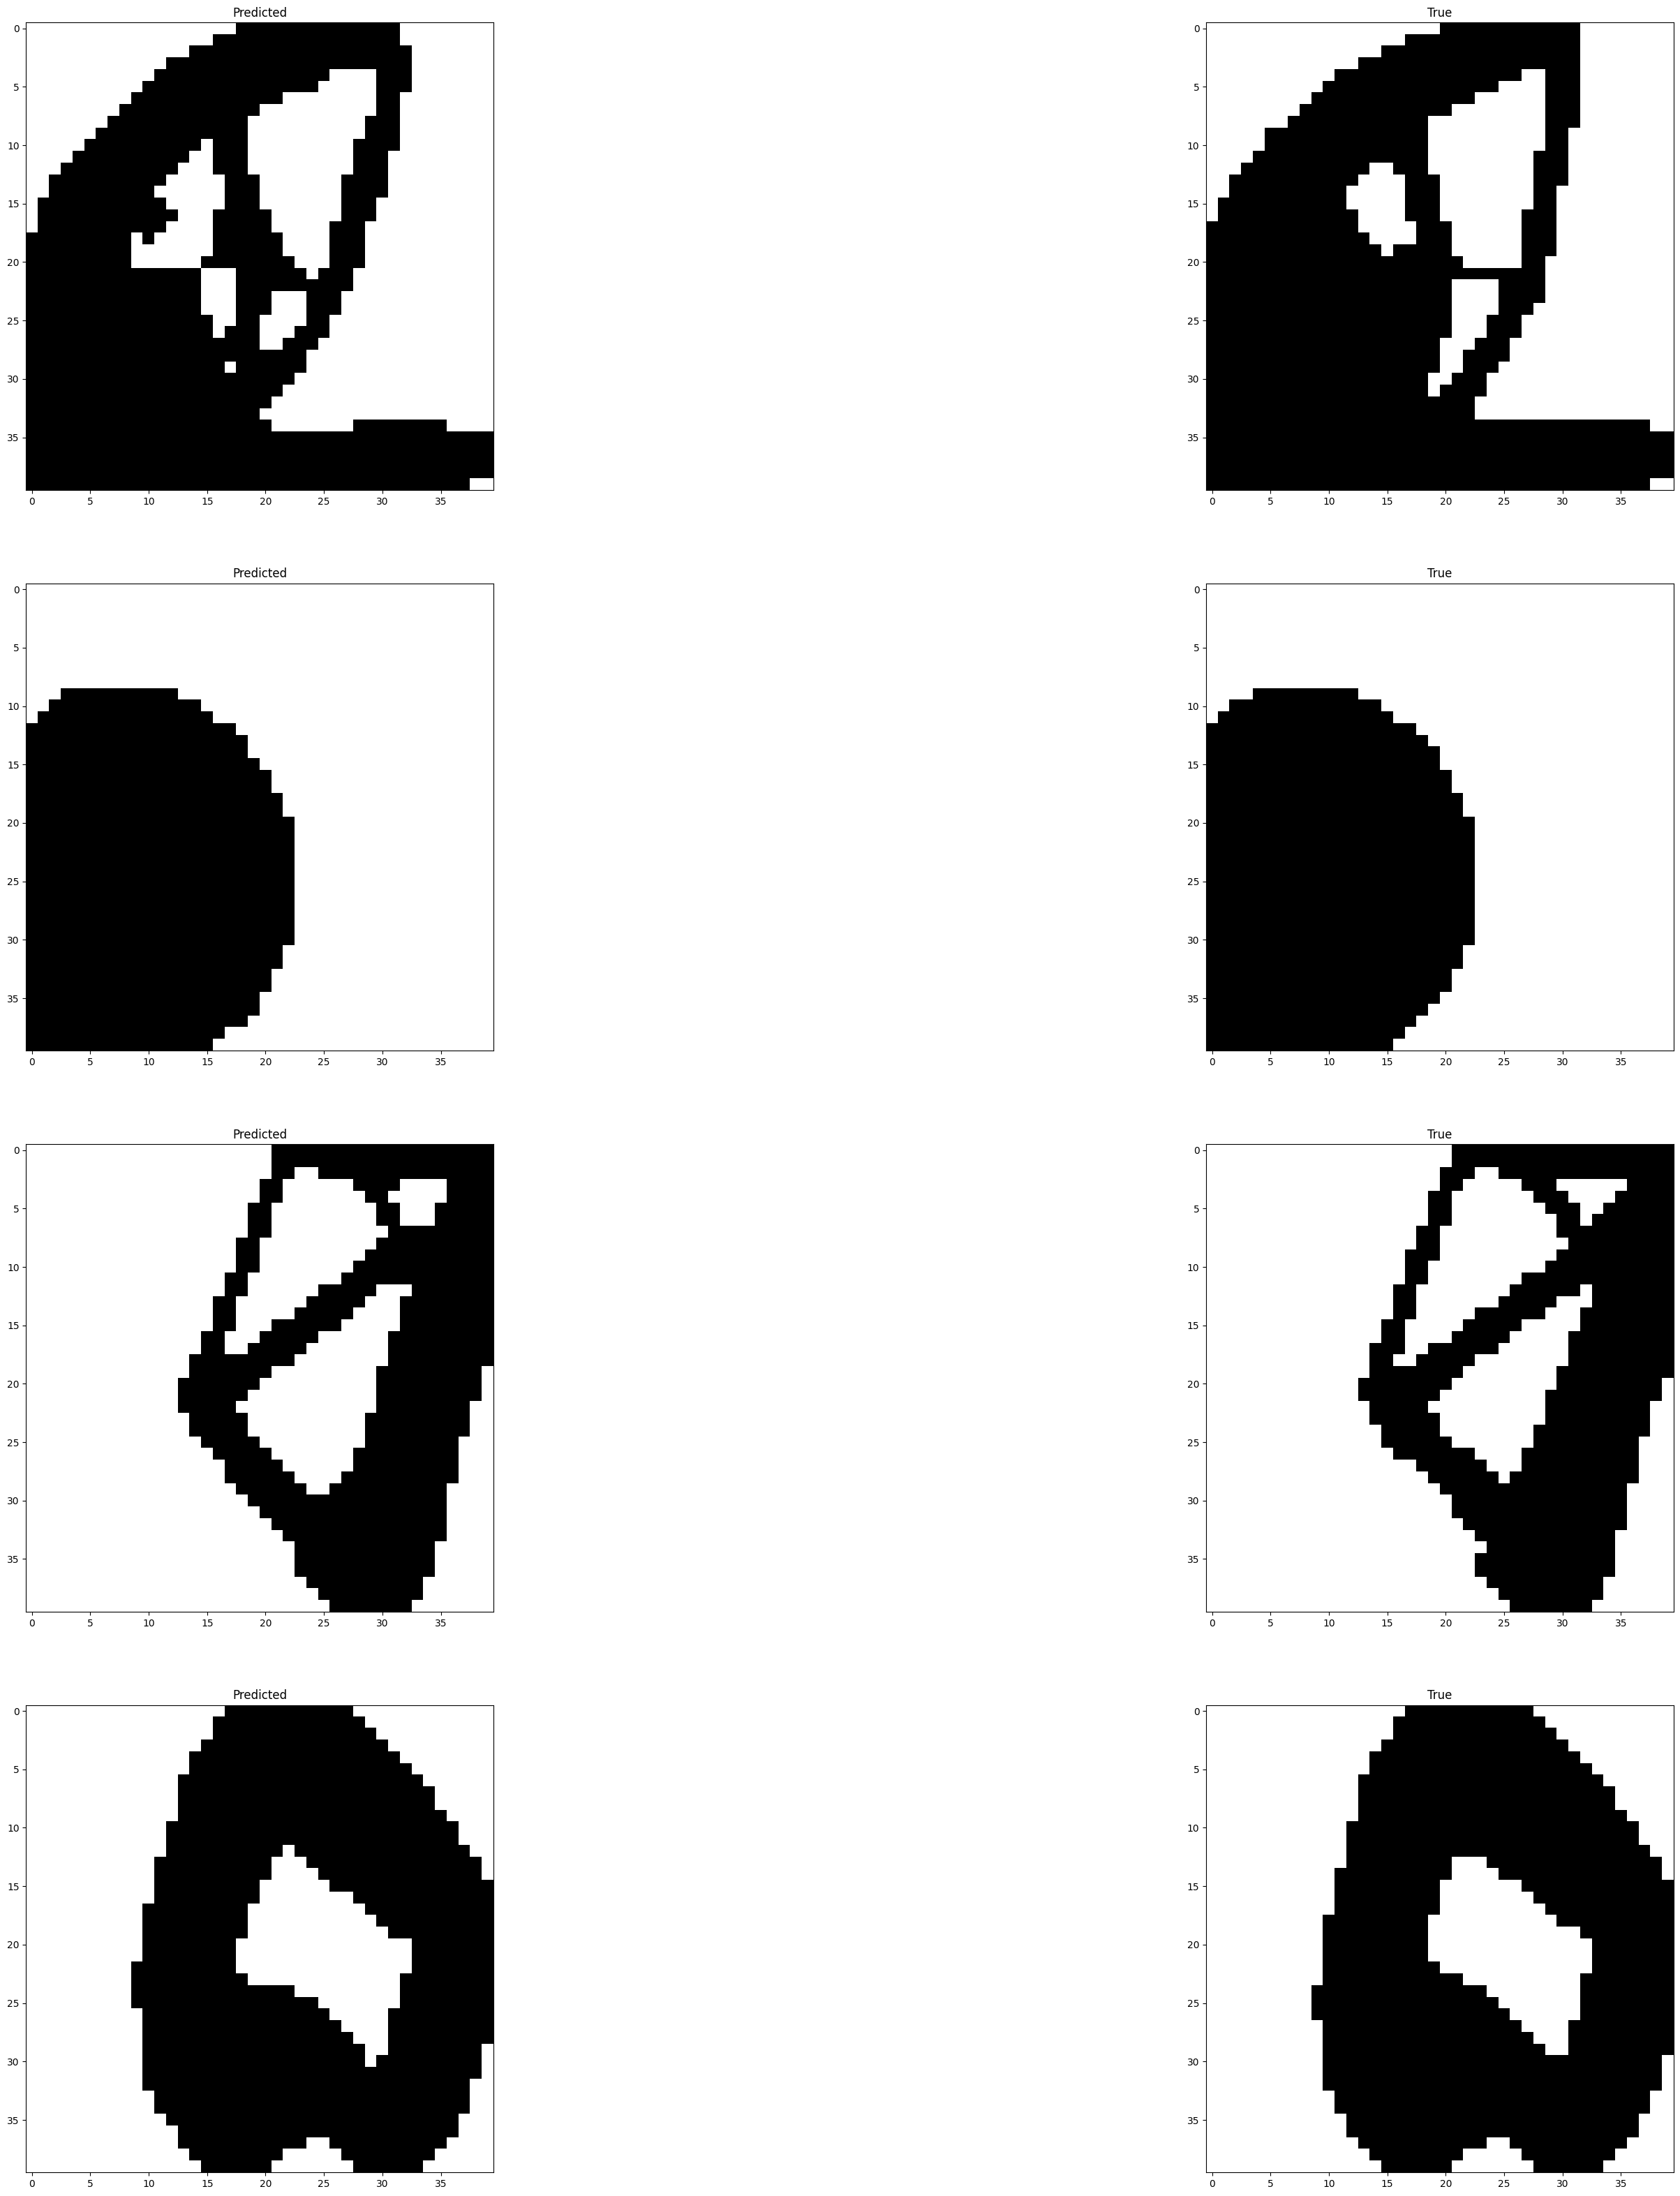

In [81]:
# Test 
plt.figure(figsize=(40,40))
plt.subplot(4,2,1)
plt.imshow(pr[num].view(40,40), cmap='binary')
plt.title('Predicted')

plt.subplot(4,2,2)
plt.imshow(test_ex[1][num].view(40,40), cmap='binary')
plt.title('True')

plt.subplot(4,2,3)
plt.imshow(pr[num+1].view(40,40), cmap='binary')
plt.title('Predicted')

plt.subplot(4,2,4)
plt.imshow(test_ex[1][num+1].view(40,40), cmap='binary')
plt.title('True')

plt.subplot(4,2,5)
plt.imshow(pr[num+2].view(40,40), cmap='binary')
plt.title('Predicted')

plt.subplot(4,2,6)
plt.imshow(test_ex[1][num+2].view(40,40), cmap='binary')
plt.title('True')

plt.subplot(4,2,7)
plt.imshow(pr[num+3].view(40,40), cmap='binary')
plt.title('Predicted')

plt.subplot(4,2,8)
plt.imshow(test_ex[1][num+3].view(40,40), cmap='binary')
plt.title('True')

Text(0.5, 1.0, 'True')

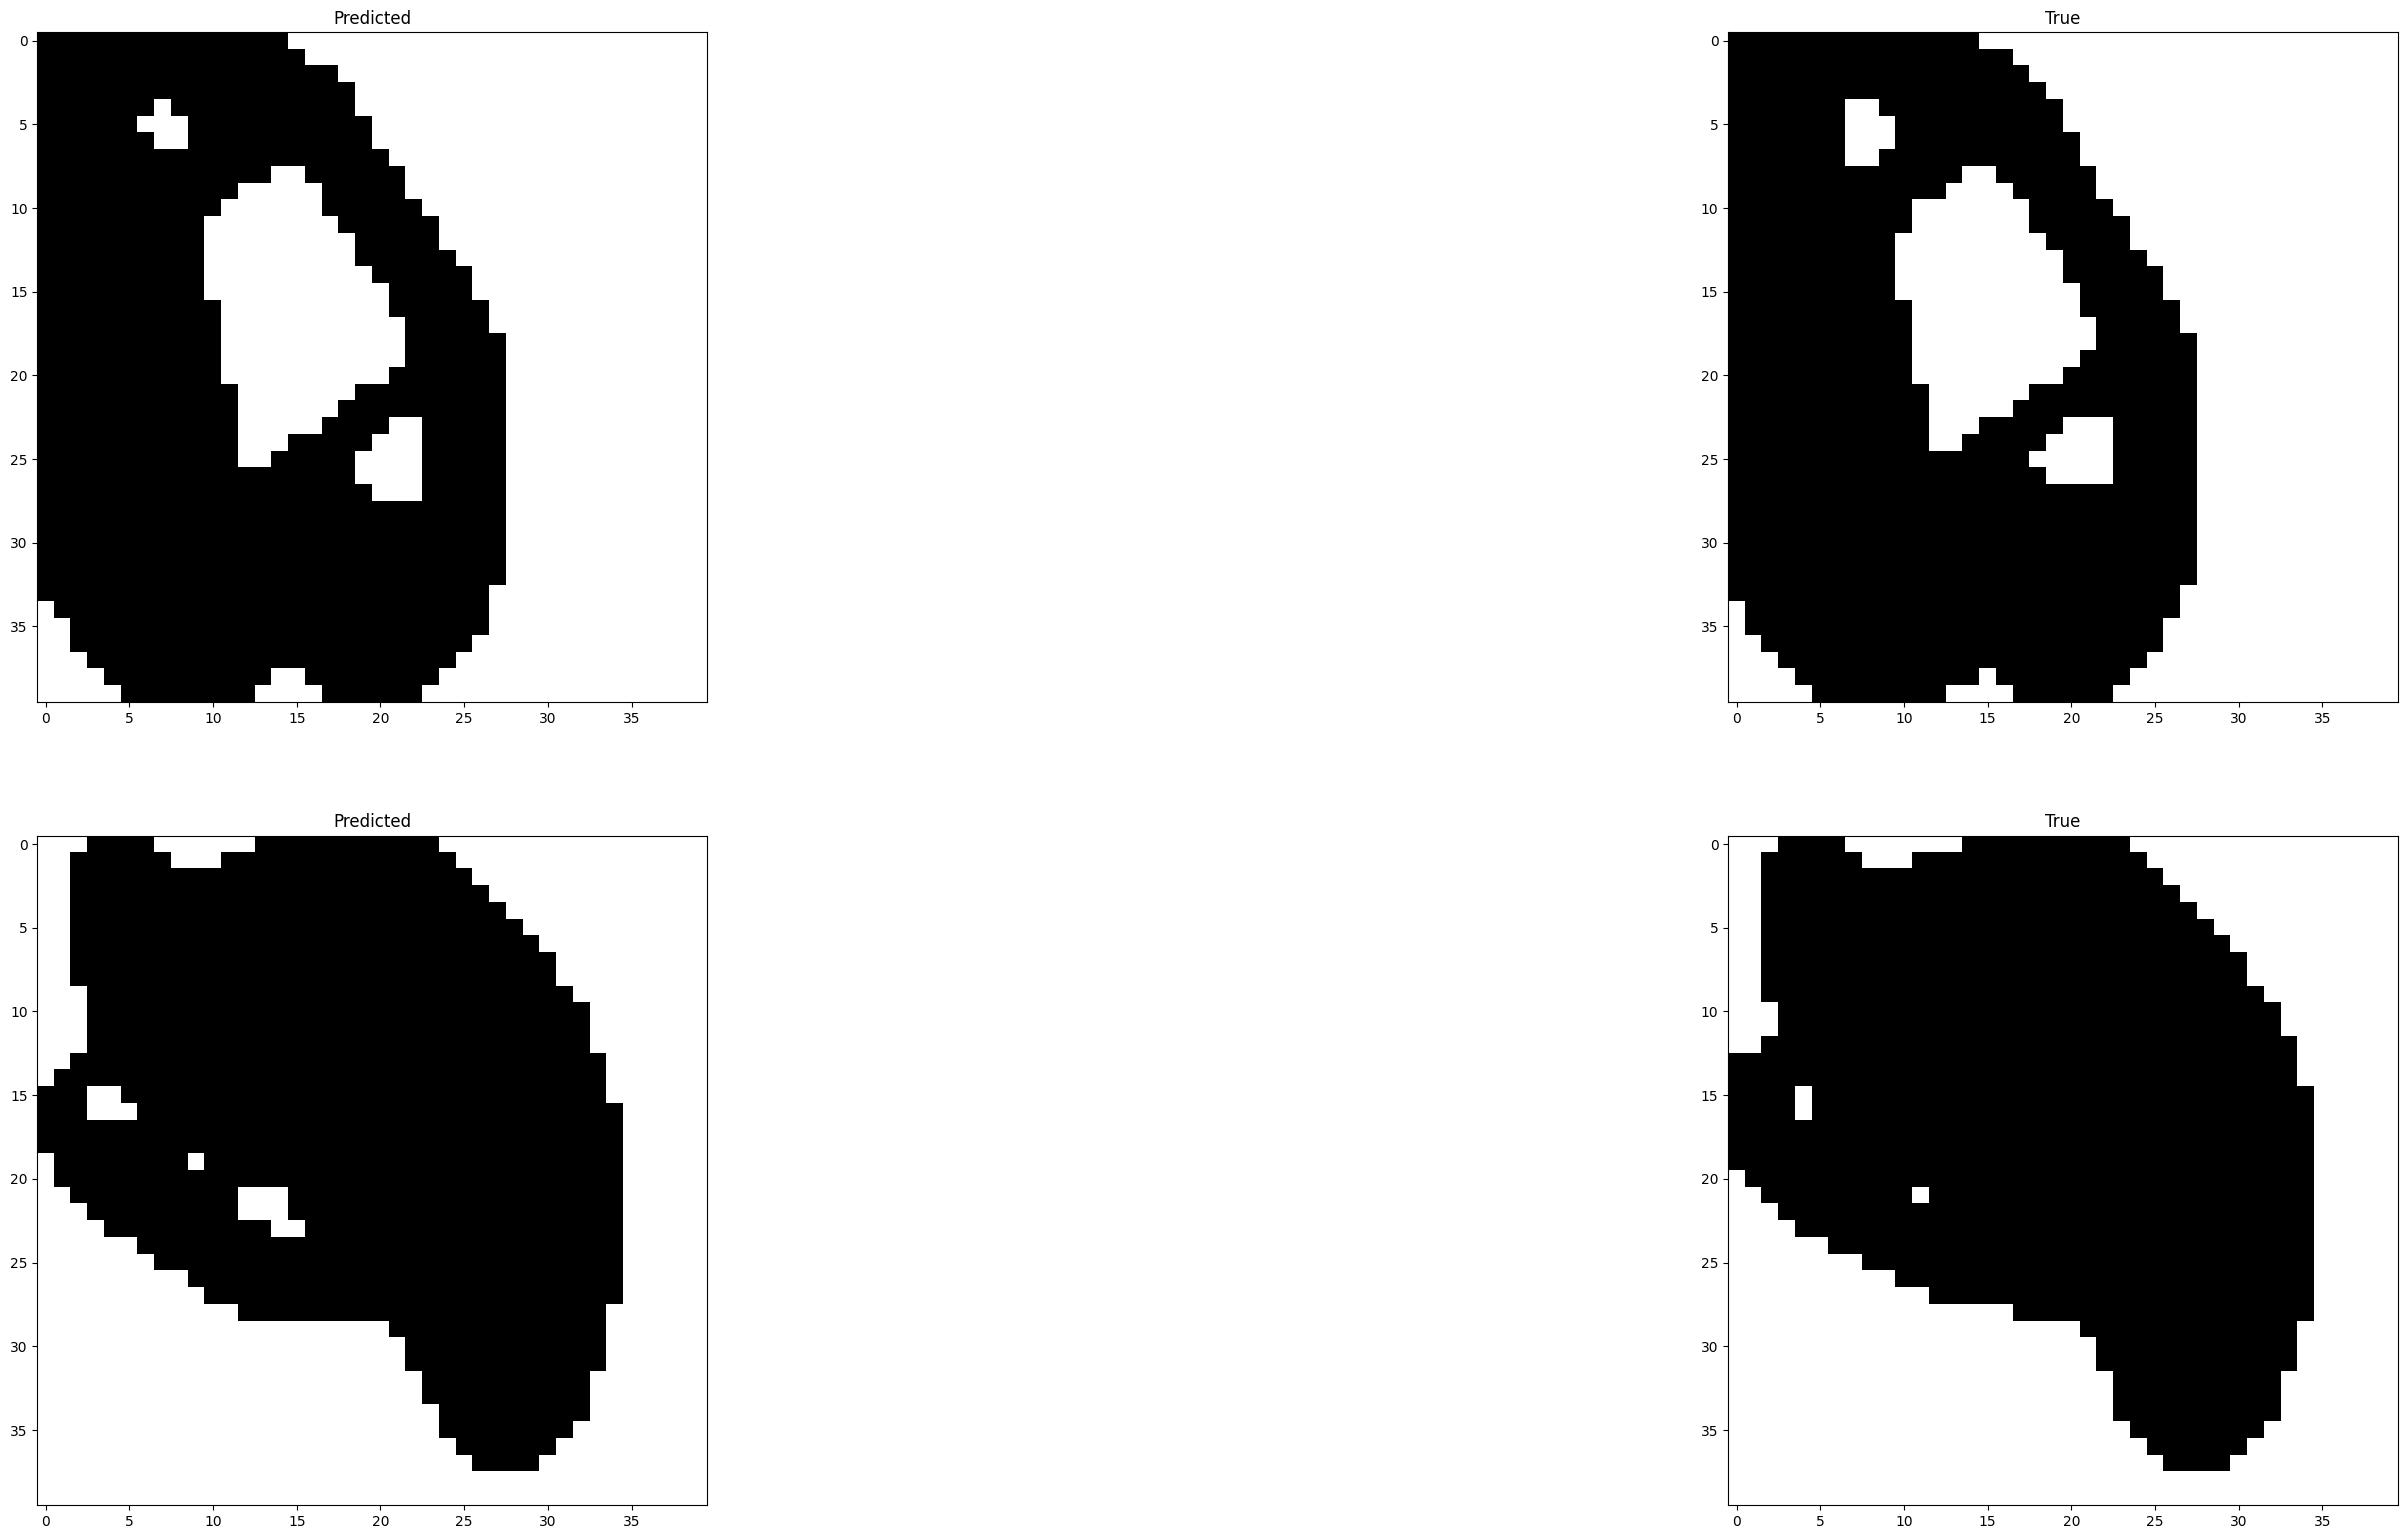

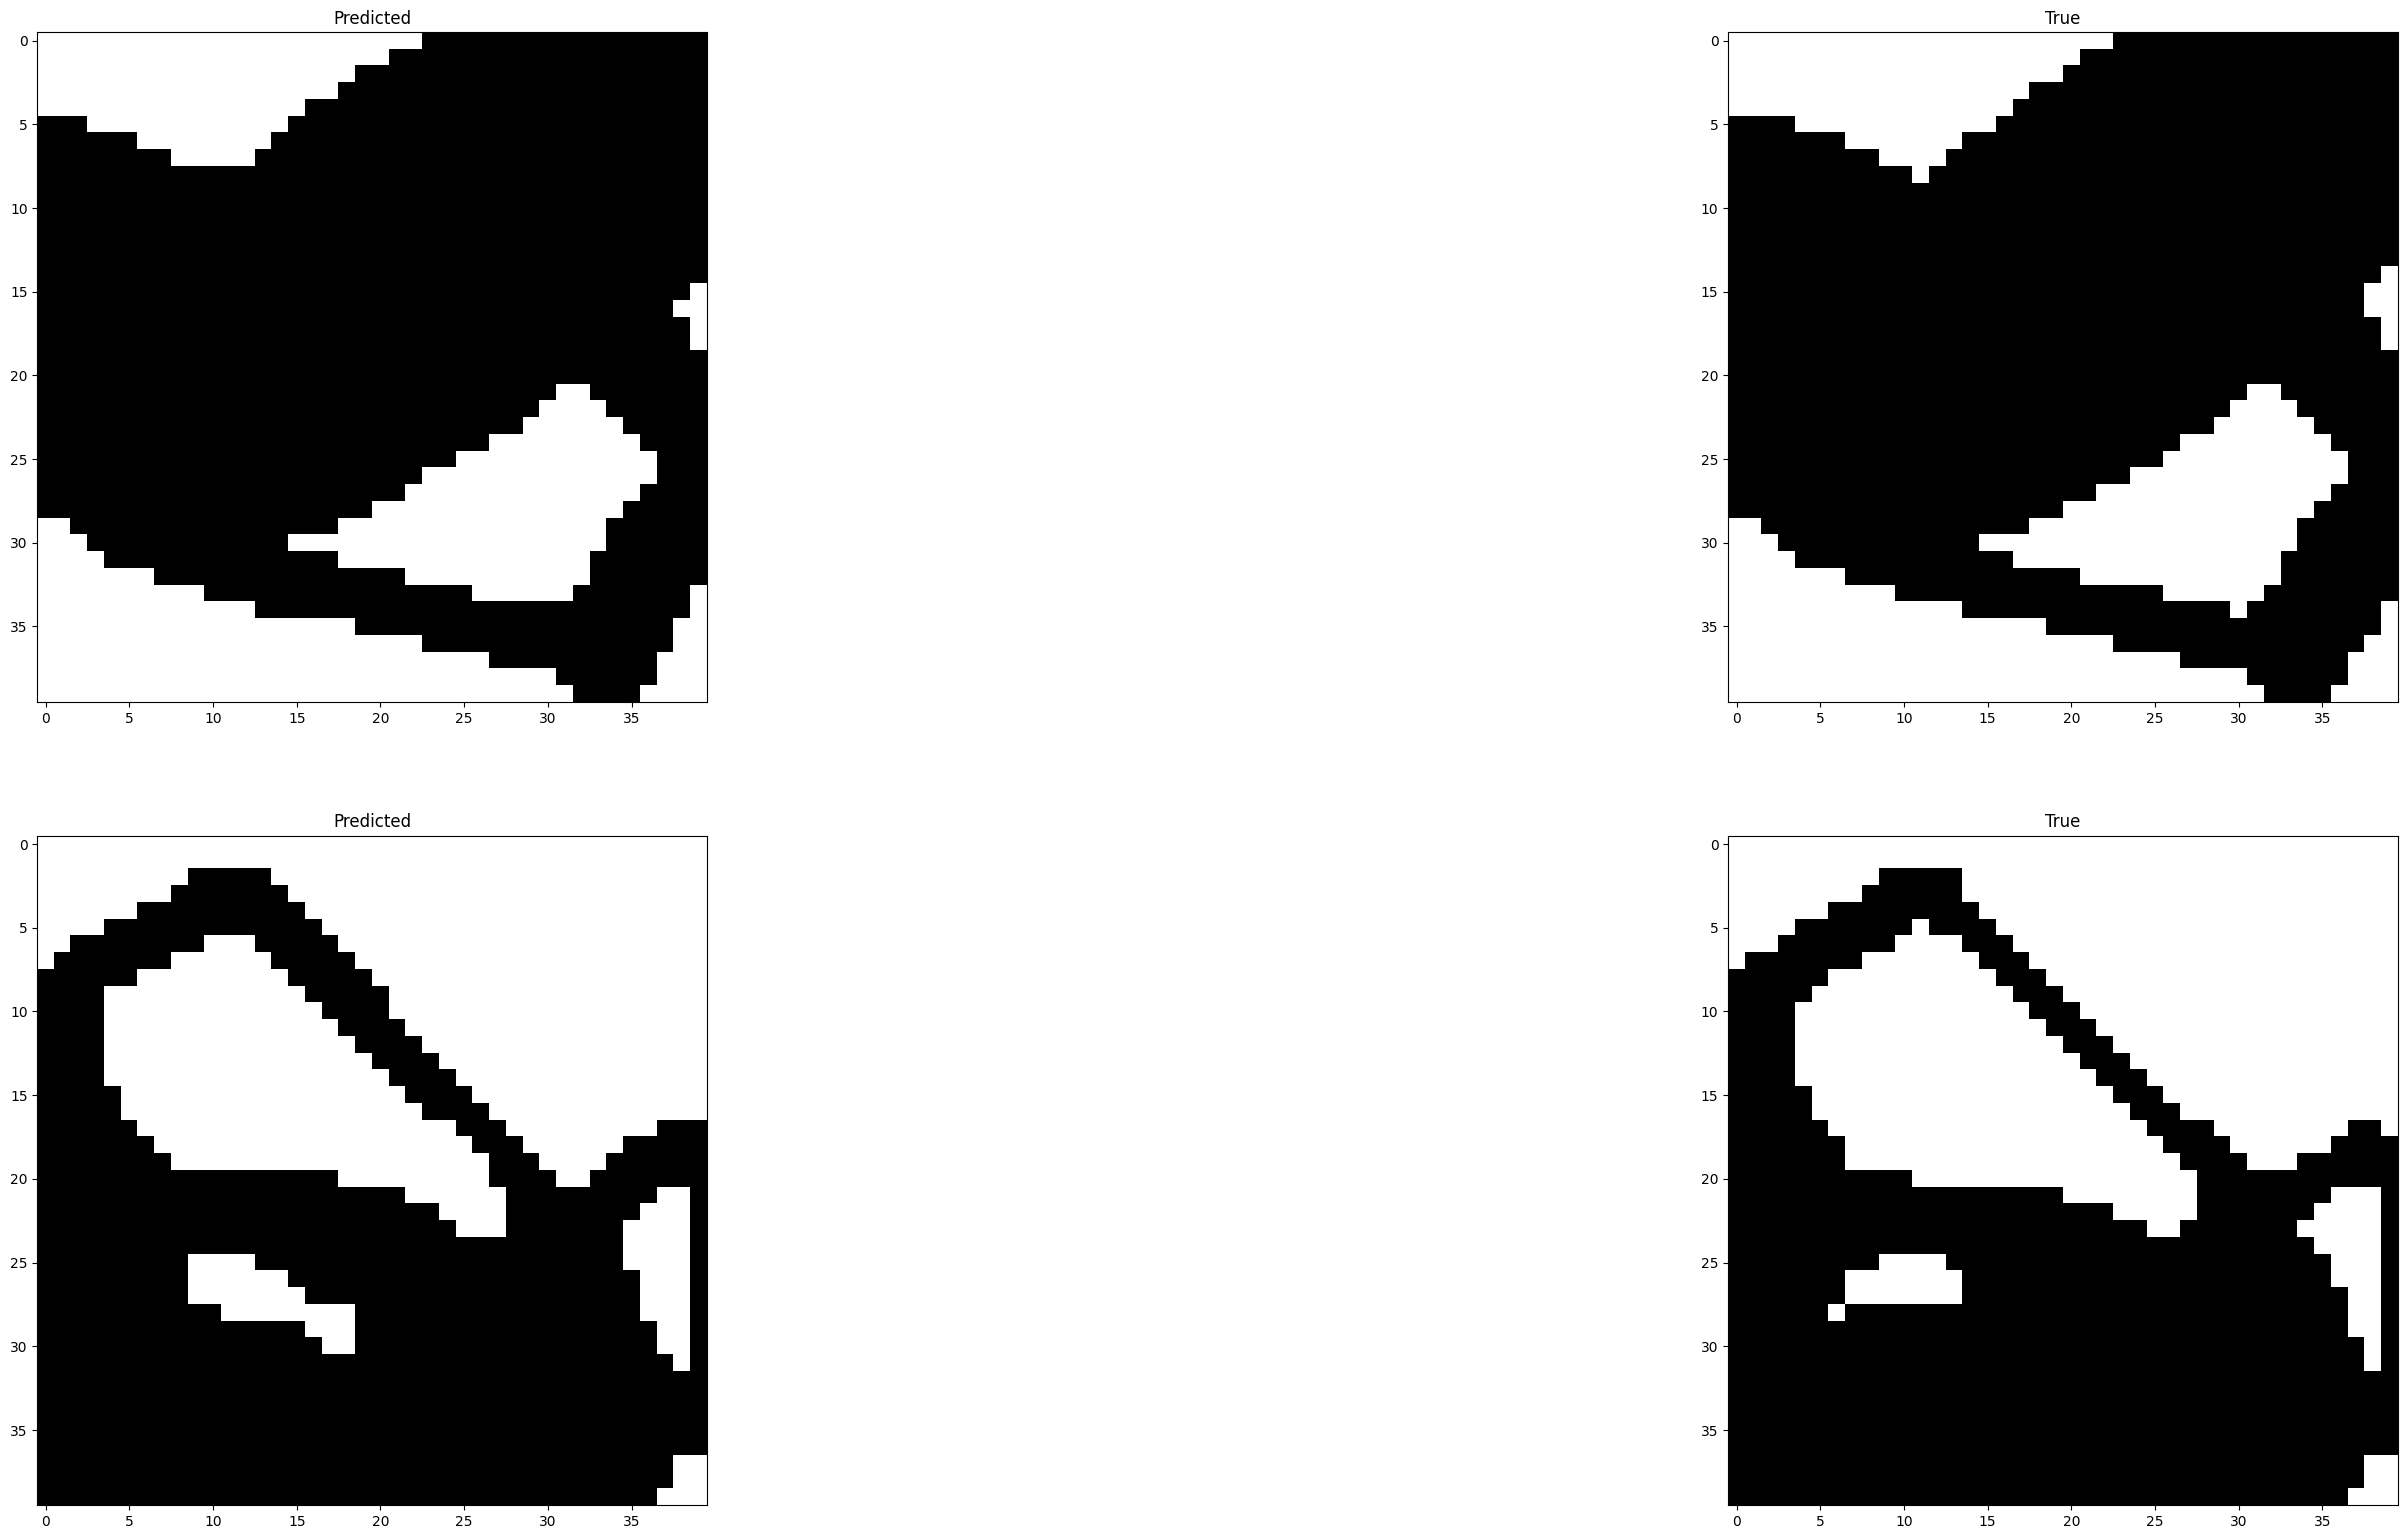

In [82]:
# Train
plt.figure(figsize=(40,40))
plt.subplot(4,2,1)
plt.imshow(tr[num].view(40,40), cmap='binary')
plt.title('Predicted')

plt.subplot(4,2,2)
plt.imshow(train_ex[1][num].view(40,40), cmap='binary')
plt.title('True')

plt.subplot(4,2,3)
plt.imshow(tr[num+1].view(40,40), cmap='binary')
plt.title('Predicted')

plt.subplot(4,2,4)
plt.imshow(train_ex[1][num+1].view(40,40), cmap='binary')
plt.title('True')


plt.figure(figsize=(40,40))
plt.subplot(4,2,1)
plt.imshow(tr[num+2].view(40,40), cmap='binary')
plt.title('Predicted')

plt.subplot(4,2,2)
plt.imshow(train_ex[1][num+2].view(40,40), cmap='binary')
plt.title('True')

plt.subplot(4,2,3)
plt.imshow(tr[num+3].view(40,40), cmap='binary')
plt.title('Predicted')

plt.subplot(4,2,4)
plt.imshow(train_ex[1][num+3].view(40,40), cmap='binary')
plt.title('True')



In [43]:
FILE = "model_2.pth"

In [44]:
features = [16,32,64]

In [45]:
torch.save(model.state_dict(), FILE)

In [46]:
checkpoint = {
    "epoch":100,
    "model_state": model.state_dict(),
    "optim_state": optimizer.state_dict(),
    "features": features
}

In [47]:
torch.save(checkpoint, "checkpoint_2.pth")

In [ ]:
test_ex[0][0].shape

In [117]:
model.state_dict()

OrderedDict([('ups.0.weight',
              tensor([[[[-0.0393,  0.0040],
                        [ 0.0193,  0.0318]],
              
                       [[-0.0155, -0.0132],
                        [-0.0328, -0.0550]],
              
                       [[ 0.0053, -0.0055],
                        [-0.0275,  0.0153]],
              
                       ...,
              
                       [[ 0.0402, -0.0462],
                        [-0.0195, -0.0232]],
              
                       [[ 0.0281, -0.0281],
                        [ 0.0158, -0.0295]],
              
                       [[ 0.0133, -0.0452],
                        [-0.0280, -0.0294]]],
              
              
                      [[[ 0.0207,  0.0302],
                        [ 0.0211,  0.0052]],
              
                       [[-0.0162,  0.0448],
                        [-0.0067, -0.0090]],
              
                       [[-0.0220, -0.0052],
                        [ 0.0220,  

In [17]:
FILE = "model.pth"

In [ ]:
torch.save(model, FILE)

In [18]:
model_load = torch.load(FILE)

In [30]:
pr_load = model_load(test_ex[0])
tr_load = model_load(train_ex[0])

In [62]:
def check_accuracy(loader, model):
    num_correct = 0
    num_pixels = 0
    dice_score = 0
    
    with torch.no_grad():
        for x,y in loader:
            preds = model(x)
            preds = (preds > 0.5).float()
            num_correct +=  (preds ==y).sum()
            num_pixels += torch.numel(preds)
            dice_score += (2 * (preds * y).sum()) / ((preds + y).sum())
    
    print(
        f"Got {num_correct}/{num_pixels} with acc {num_correct/num_pixels*100:.2f}"
    )
    print(f"Dice score: {dice_score/len(loader)}")

In [74]:
check_accuracy(train_loader, model)

Got 12474689/12800000 with acc 97.46
Dice score: 0.9741436839103699


In [75]:
check_accuracy(test_set, model)

Got 3093269/3200000 with acc 96.66
Dice score: 0.9660056233406067


In [161]:
len(test_set)

20